# Integrantes

1. a1805	Natalia Beatriz	Diaz

2. a1822	Cristian Patricio Salinas Talamilla

3. a1812	Ezequiel Eduardo Maudet

4. a1819	Manuel Pineyro

# Consigna
Se requiere construir una regresión que nos permita predecir el valor medio de las casas en distritos de California, EEUU (medidos en cientos de miles de dólares $100,000). Este dataset se deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Los atributos, en el orden en que se guardaron en el dataset, son:

* MedInc: Ingreso medio en el bloque
* HouseAge: Edad mediana de las casas en el bloque
* AveRooms: Número promedio de habitaciones por hogar.
* AveBedrms: Número promedio de dormitorios por hogar.
* Population: Población del bloque add / 
* AveOccup: Número promedio de miembros por hogar.
* Latitude: Latitud del bloque
* Longitude: Longitud del bloque

Y el target es:


MedHouseVal: Mediana del costo de casas en el bloque (en unidades de a $100.000)


# Desarrollo - California Housing

## Ingesta de Datos

In [1]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [3]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target
print(X)
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
california_housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
california_housing['target_names']

['MedHouseVal']

In [6]:
# Transformamos en Pandas DataSet
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [7]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Consiga 1:
Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [9]:
df_california.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [10]:
df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

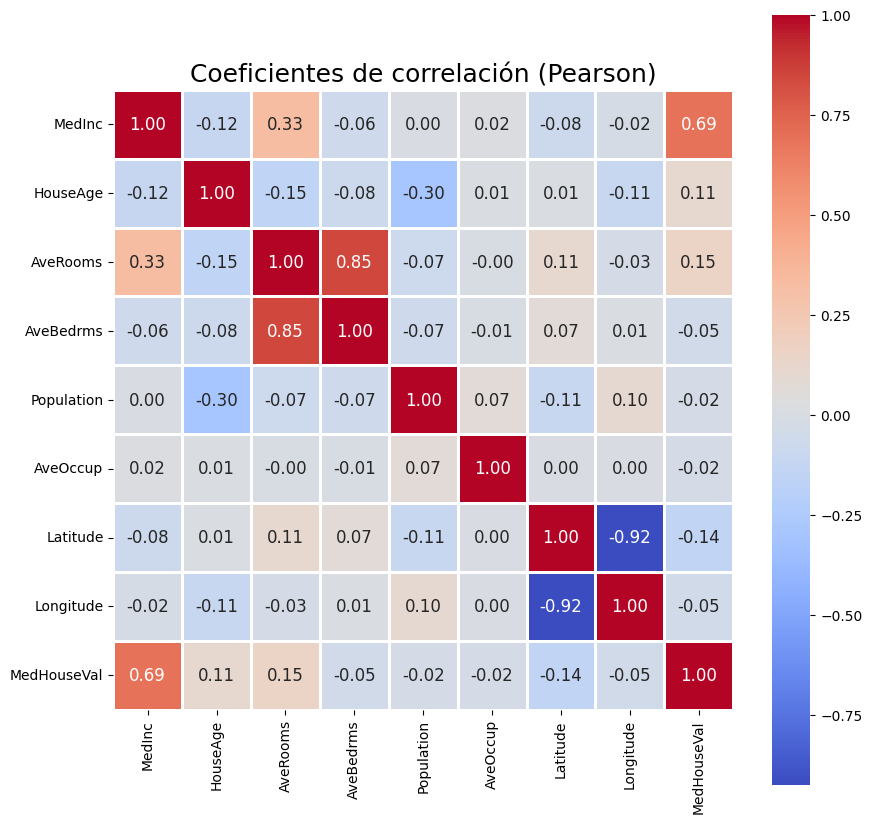

In [11]:
plt.figure(figsize = (5,5))
sns.heatmap(df_california.corr(), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'coolwarm', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

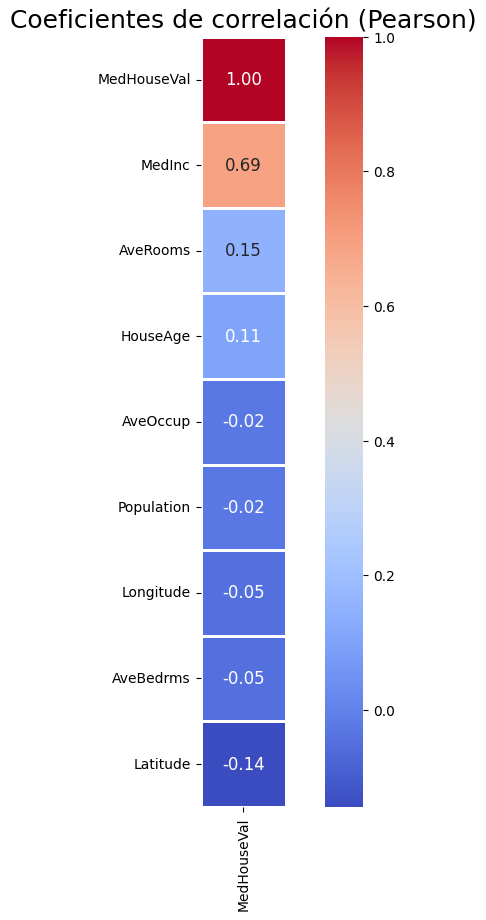

In [12]:
plt.figure(figsize = (5,5))
sns.heatmap(df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'coolwarm', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

In [13]:
# Crear la grilla de gráficos
#Demora un monton por eso esta como imagen pegada
#sns.pairplot(df_california, kind='reg')

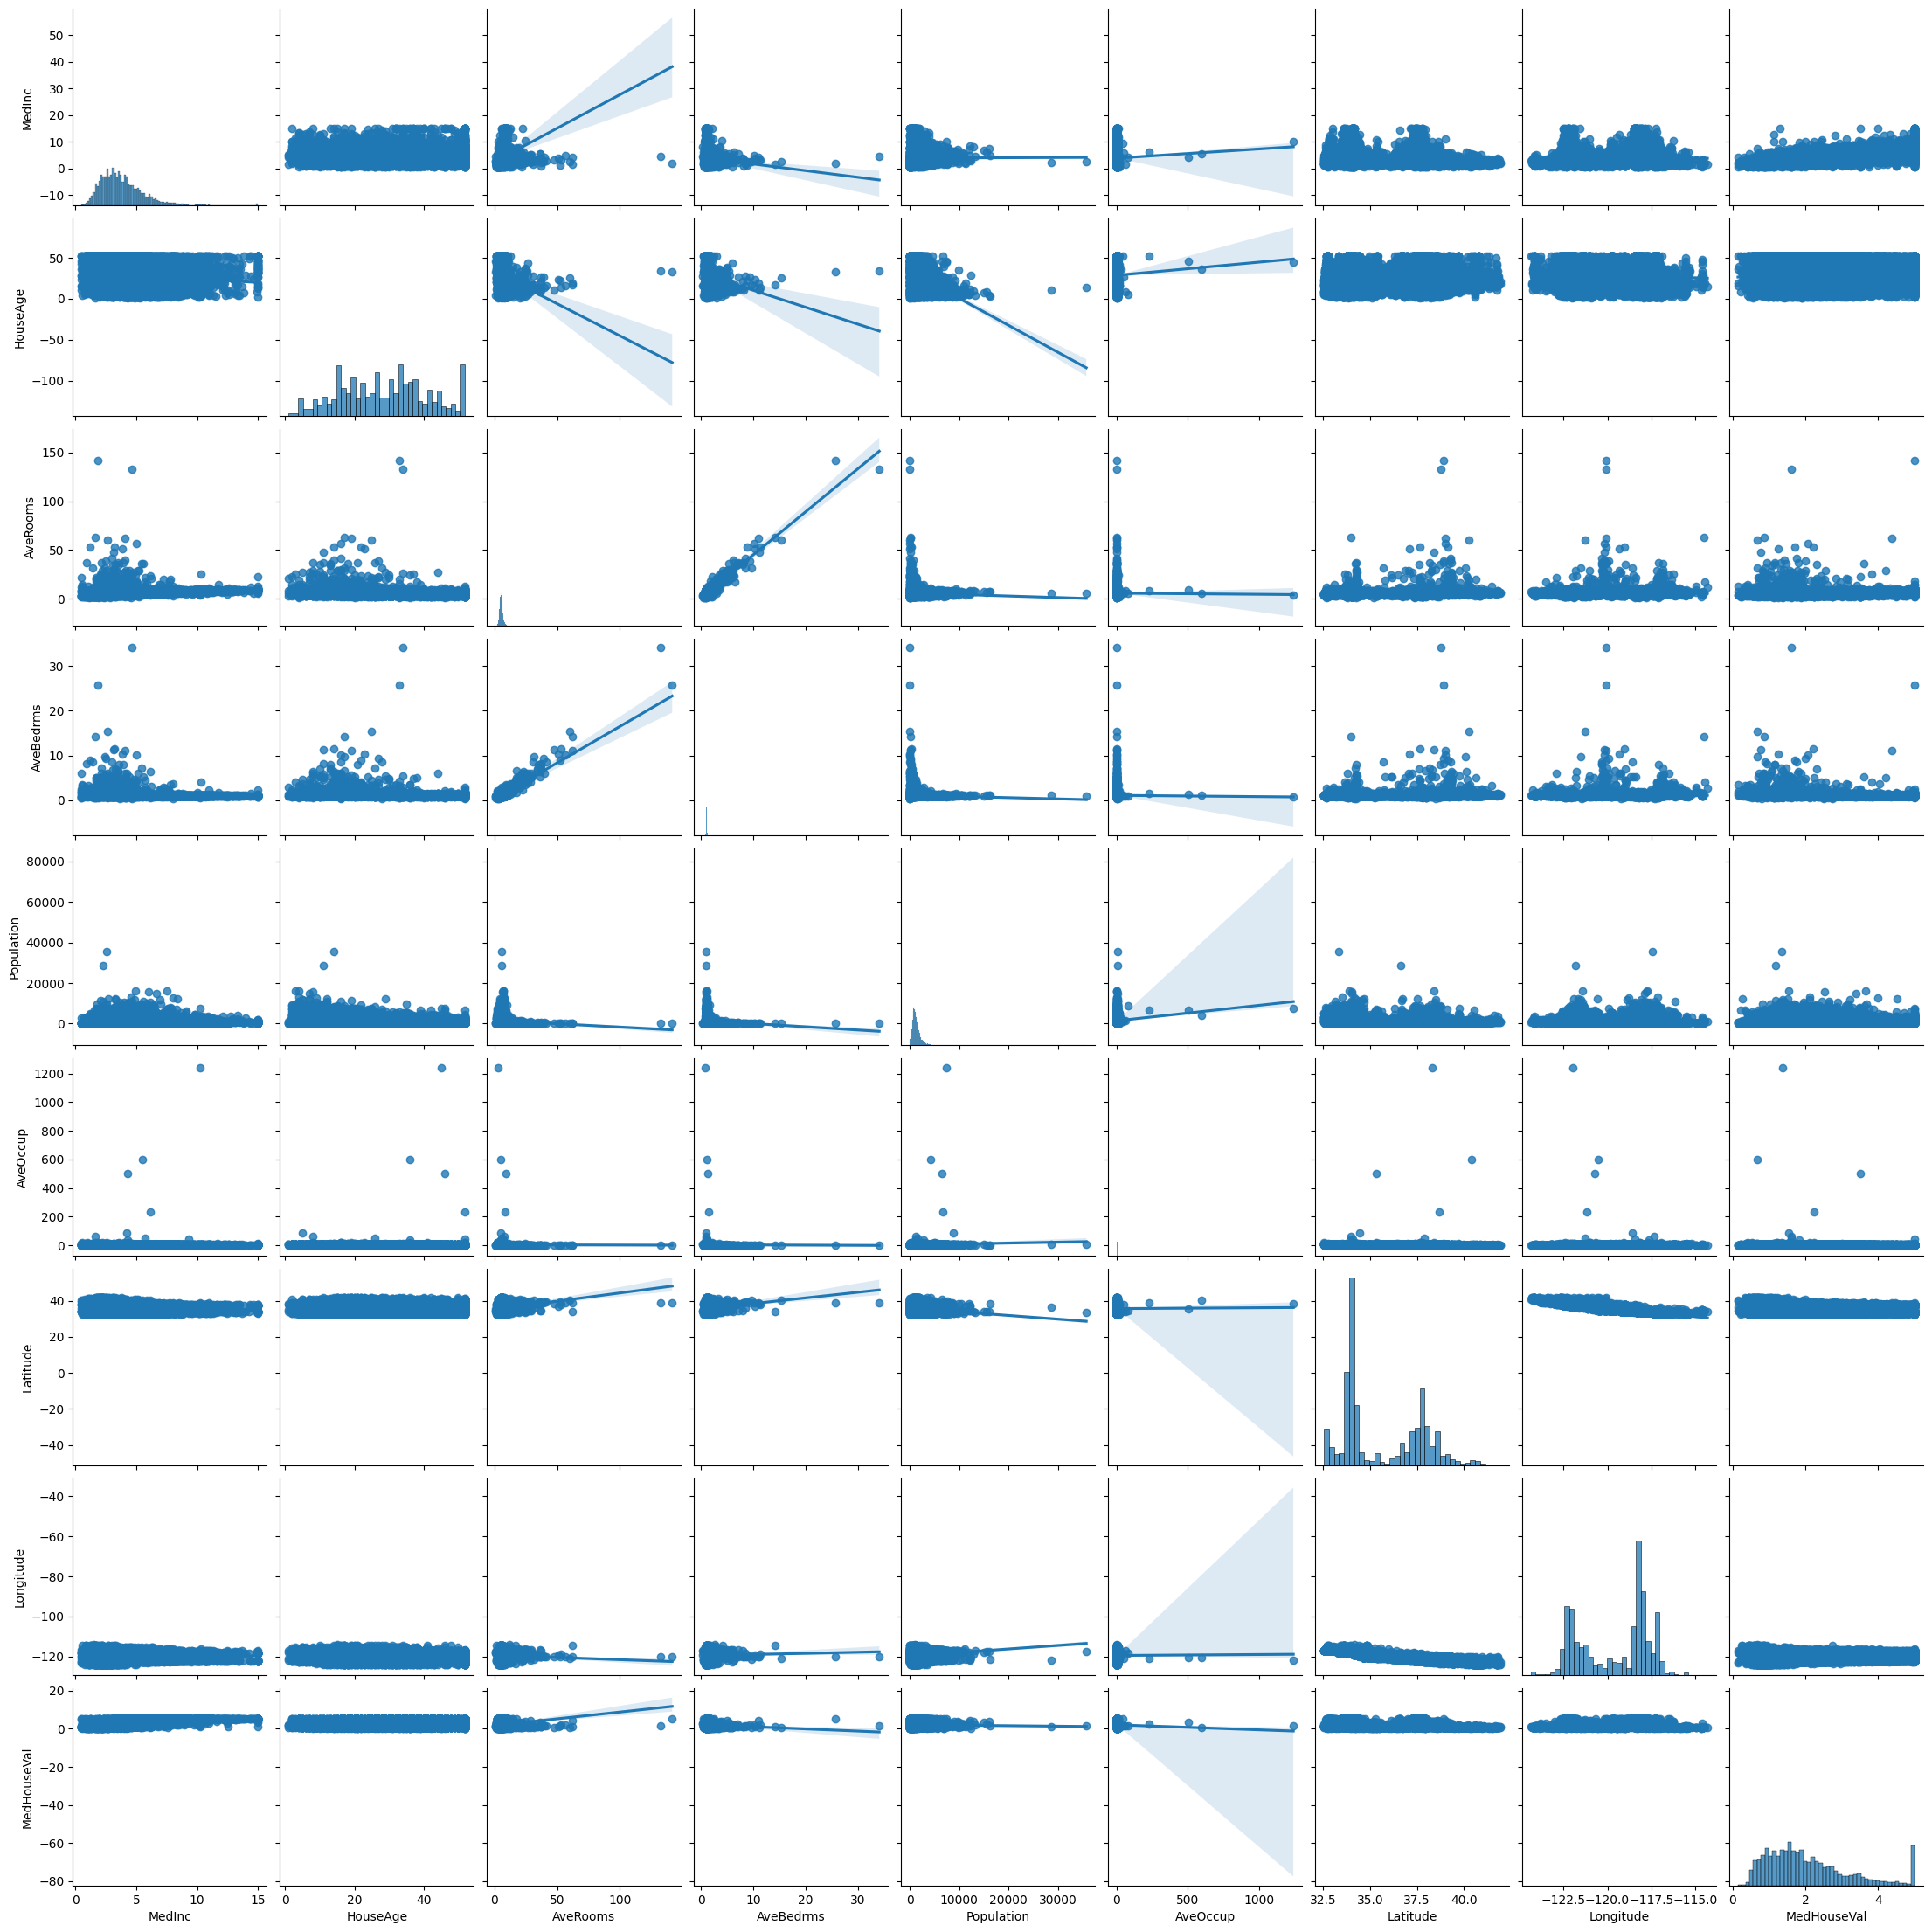

In [14]:
df_california.columns.drop('MedHouseVal')

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

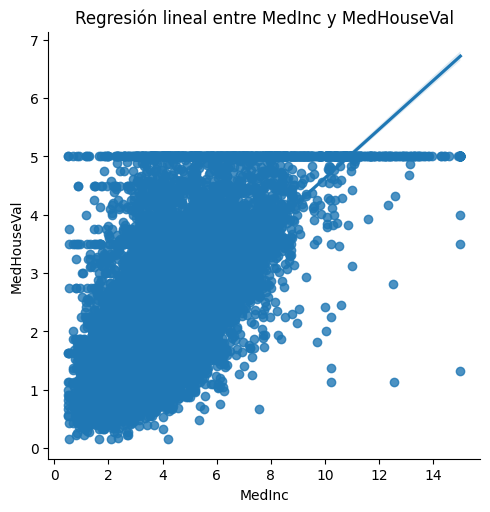

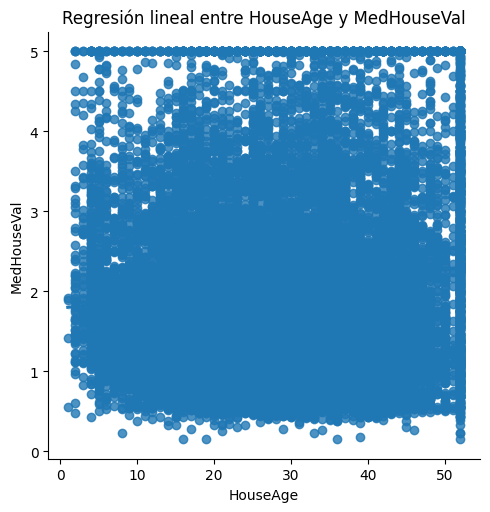

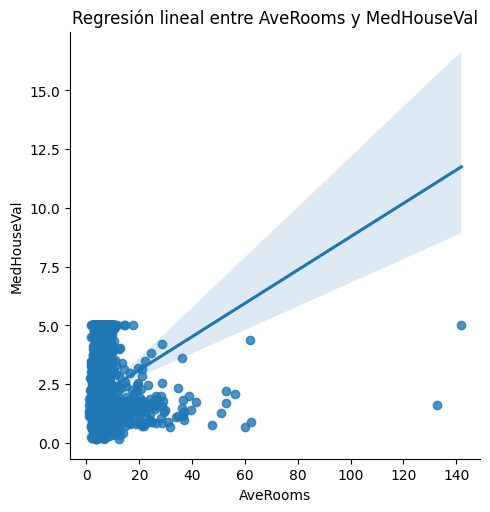

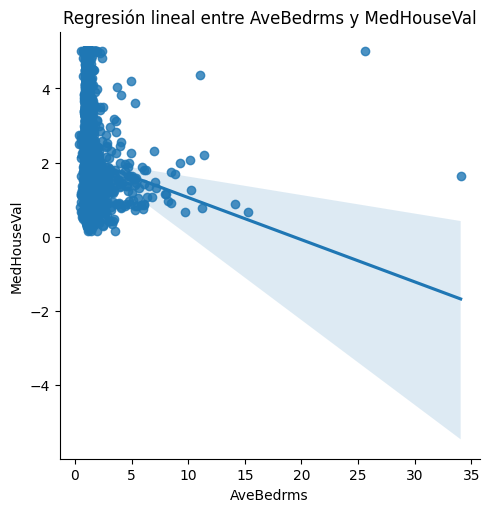

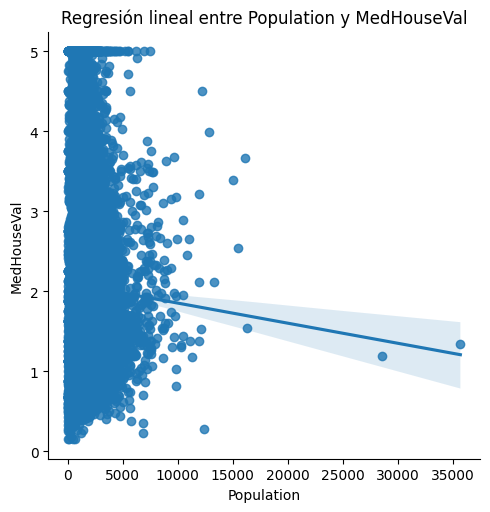

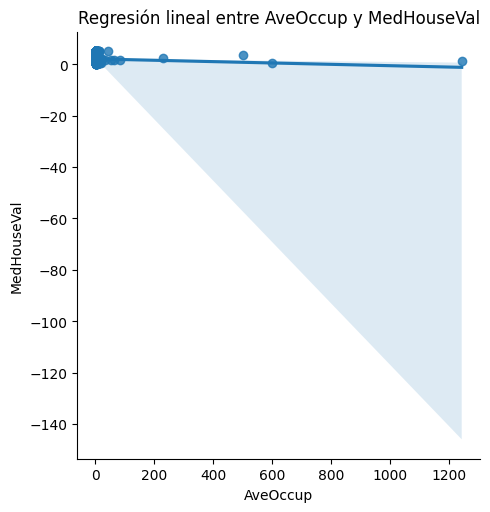

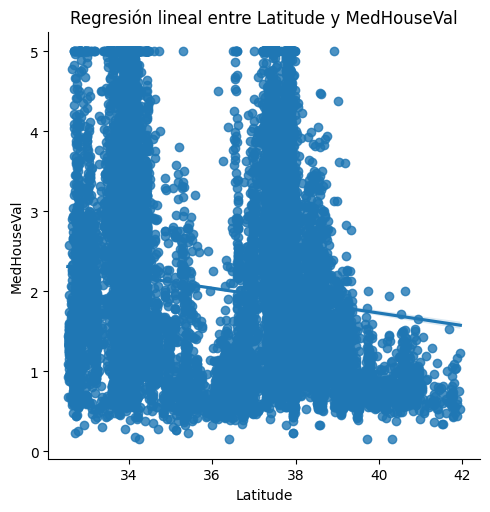

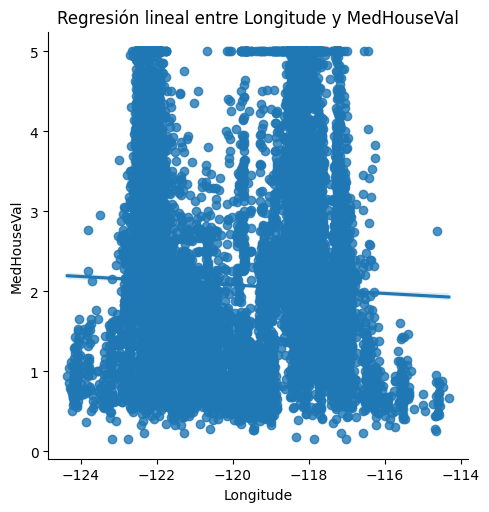

In [15]:
# Listar las columnas excepto 'MedHouseVal'
columnas = df_california.columns.drop('MedHouseVal')

# Generar un lmplot entre cada columna y 'MedHouseVal'
for columna in columnas:
    sns.lmplot(x=columna, y='MedHouseVal', data=df_california)
    plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
    plt.show()

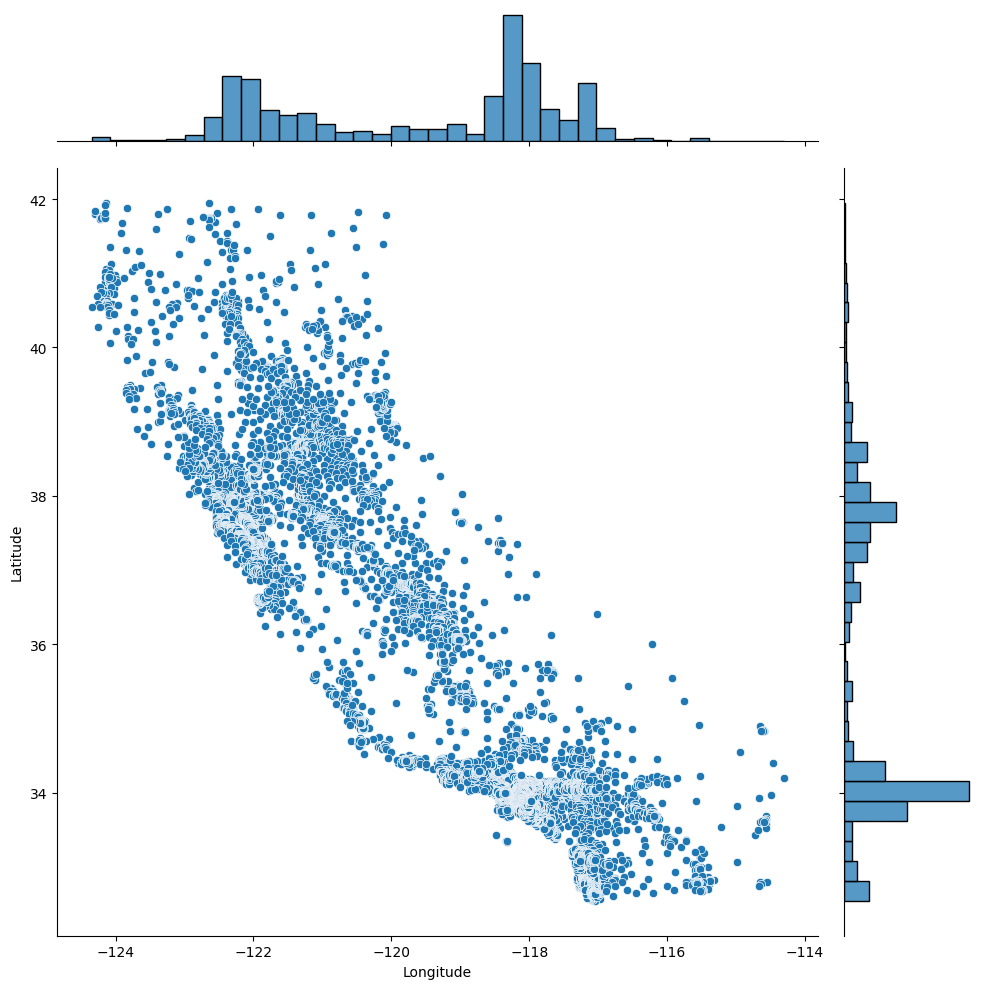

In [16]:
sns.jointplot(data= df_california,
                #.loc[ propiedades_filtro.precio_m2 < 1000 ,:],
                y = 'Latitude', 
                x = 'Longitude', 
                #hue = "property_type",
                height = 10,
                palette ="Spectral_r",
                #kind = "hex", 
                #kind= "kde"
                )

In [17]:
%pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [18]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

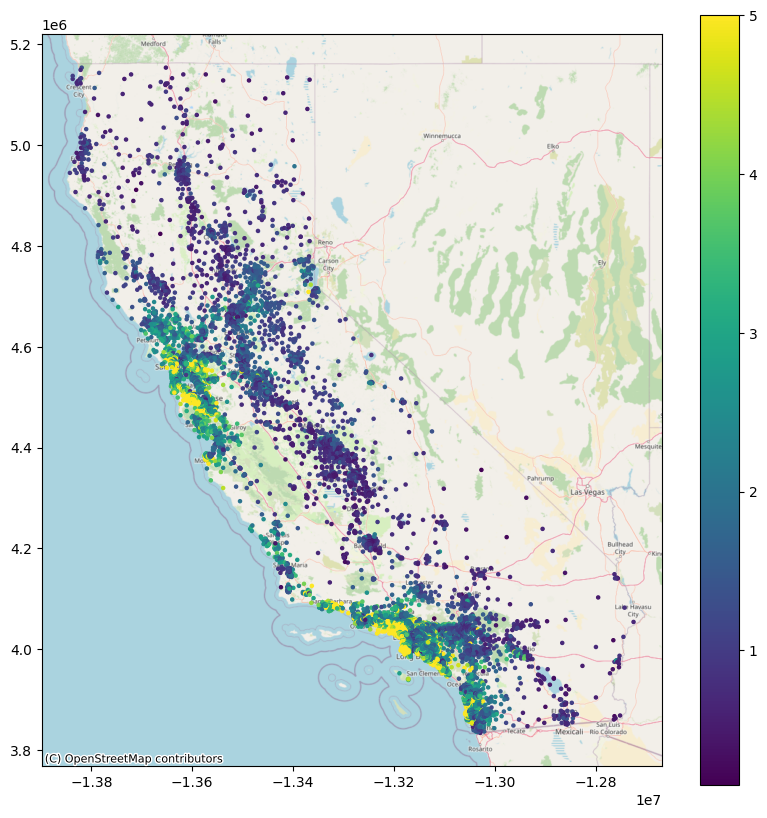

In [19]:
# Crear la geometría de puntos (Latitude, Longitude)
df_california_gpd = df_california.copy()
df_california_gpd['geometry'] = df_california_gpd.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_california_gpd, geometry='geometry')

# Establecer el sistema de coordenadas geográficas (EPSG:4326 para WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Convertir al sistema de coordenadas proyectadas (Web Mercator) para usar con el mapa base
gdf = gdf.to_crs(epsg=3857)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos en el mapa
gdf.plot(ax=ax, column='MedHouseVal',  # Especificar la columna para el color
        cmap='viridis',        # Usar una paleta continua (puedes cambiar por 'plasma', 'inferno', etc.)
        legend=True,  
        marker='o', markersize=5)

# Añadir un mapa base usando contextily (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar el mapa
plt.show()

¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [20]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [21]:
df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


*La Edad mediana de las casas en el bloque es la que tiene mayor correlacion con MedHouseVal*

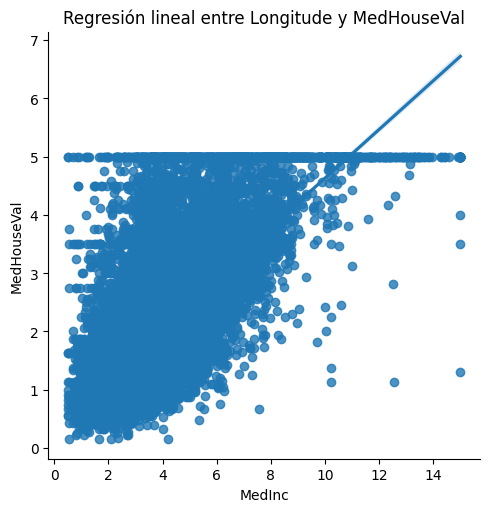

In [22]:
sns.lmplot(x='MedInc', y='MedHouseVal', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

Population: Población del bloque y HouseAge (-0.30)

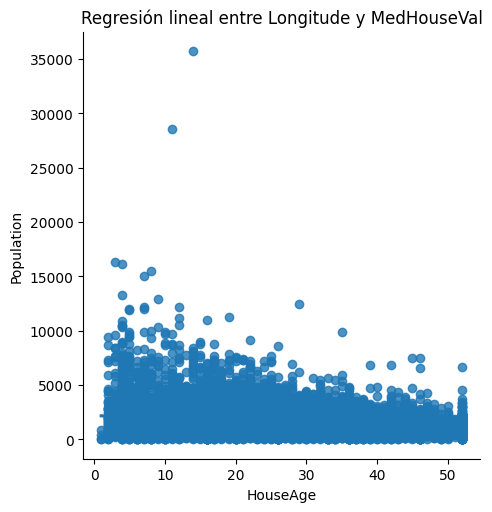

In [23]:
sns.lmplot(x='HouseAge', y='Population', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

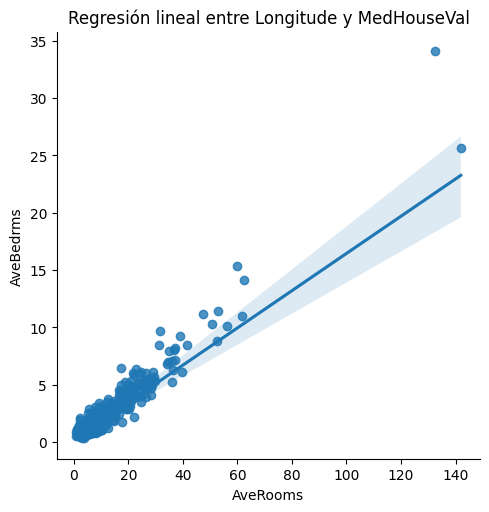

In [24]:
sns.lmplot(x='AveRooms', y='AveBedrms', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

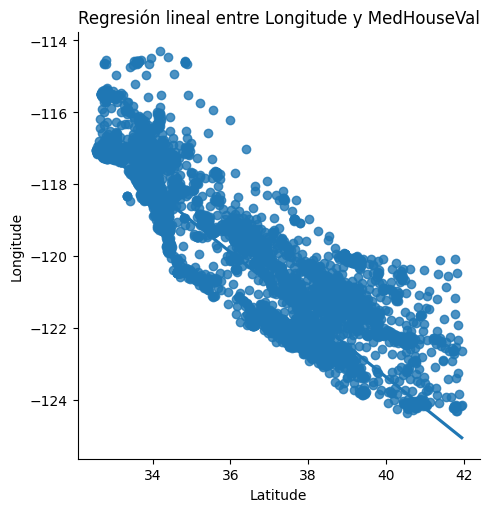

In [25]:
sns.lmplot(x='Latitude', y='Longitude', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

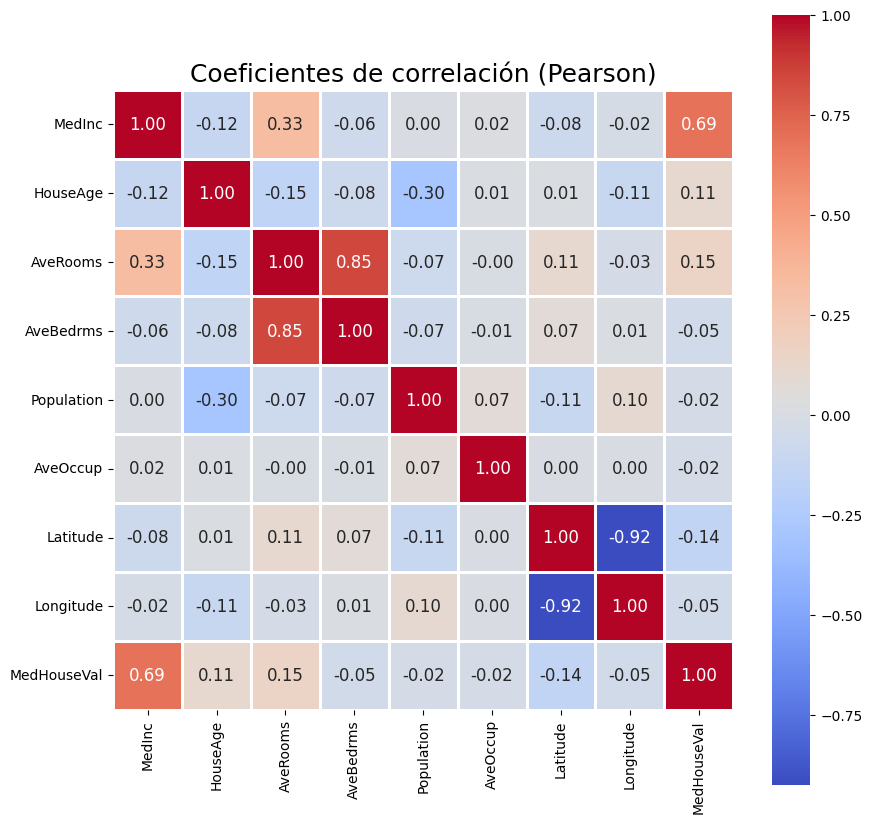

## Consigna 2:
Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

In [26]:
def plot_box_hist(data, column, figsize=(15, 8)):
    """
    Crea un gráfico con un boxplot encima y un histograma debajo de una columna de datos.

    Parámetros:
    - data: DataFrame de pandas.
    - column: Columna del DataFrame que se quiere graficar.
    - threshold: Umbral opcional para filtrar los valores de la columna (por defecto no hay umbral).
    - figsize: Tamaño de la figura (ancho, alto), por defecto (15, 8).
    """
    
    # Crear la figura y los ejes
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Graficar el boxplot y el histograma
    sns.boxplot(data=data, x=column, ax=ax_box)
    sns.histplot(data[column], ax=ax_hist)
    
    # Eliminar el nombre del eje x en el boxplot
    ax_box.set(xlabel='')
    
    # Ajustar el tamaño de la figura
    plt.gcf().set_size_inches(*figsize)
    
    # Mostrar el gráfico
    plt.show()

In [27]:
def plot_all_numeric_columns(df, figsize=(15, 8)):
    """
    Recorre todas las columnas numéricas de un DataFrame y genera un gráfico con un boxplot y un histograma
    para cada una.

    Parámetros:
    - df: DataFrame de pandas.
    - threshold: Umbral opcional para filtrar los valores de cada columna (por defecto no hay umbral).
    - figsize: Tamaño de la figura (ancho, alto), por defecto (15, 8).
    """
    
    # Obtener las columnas numéricas del DataFrame
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Iterar sobre cada columna numérica
    for column in numeric_columns:
        print(f"Generando gráficos para la columna: {column}")
        plot_box_hist(df, column, figsize=figsize)

# Función plot_box_hist (definida anteriormente) sigue siendo la misma

In [28]:
df_california.describe(percentiles=[0.1, 0.25,0.5,0.75,0.90])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
10%,1.903800,13.000000,3.790884,0.966415,510.000000,2.075630,33.630000,-122.290000,0.823000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
90%,6.159210,46.000000,6.961188,1.172727,2566.000000,3.885273,38.480000,-117.250000,3.766000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Generando gráficos para la columna: MedInc


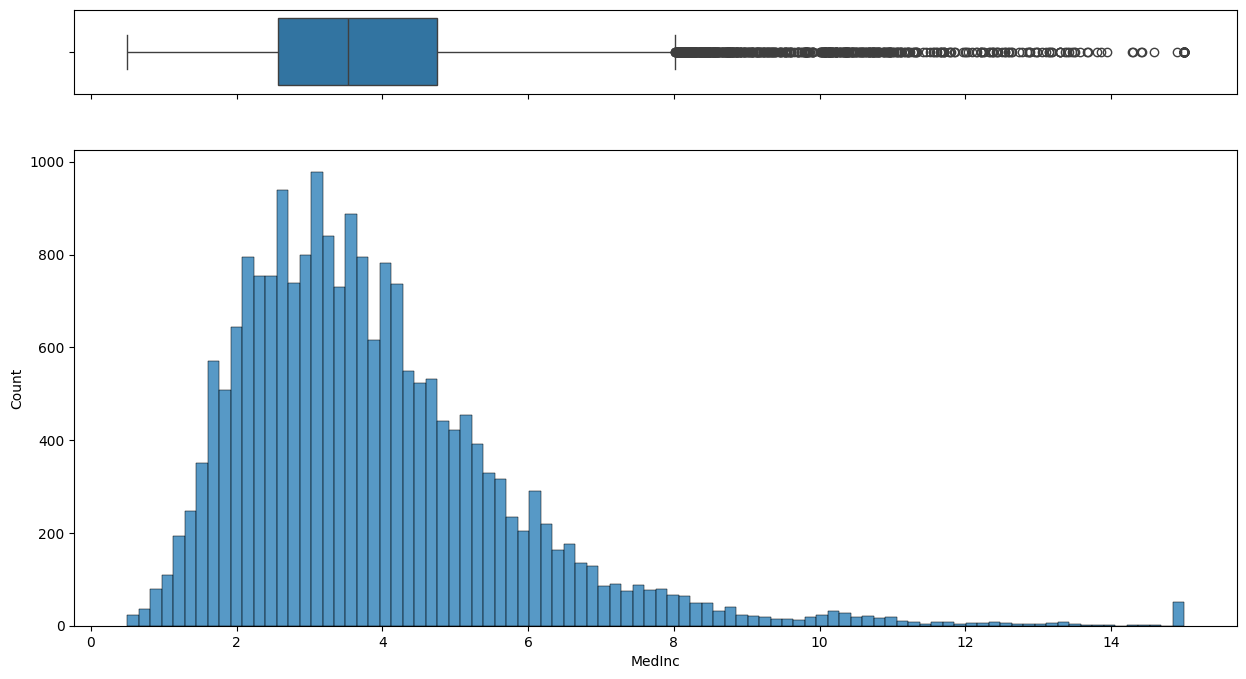

Generando gráficos para la columna: HouseAge


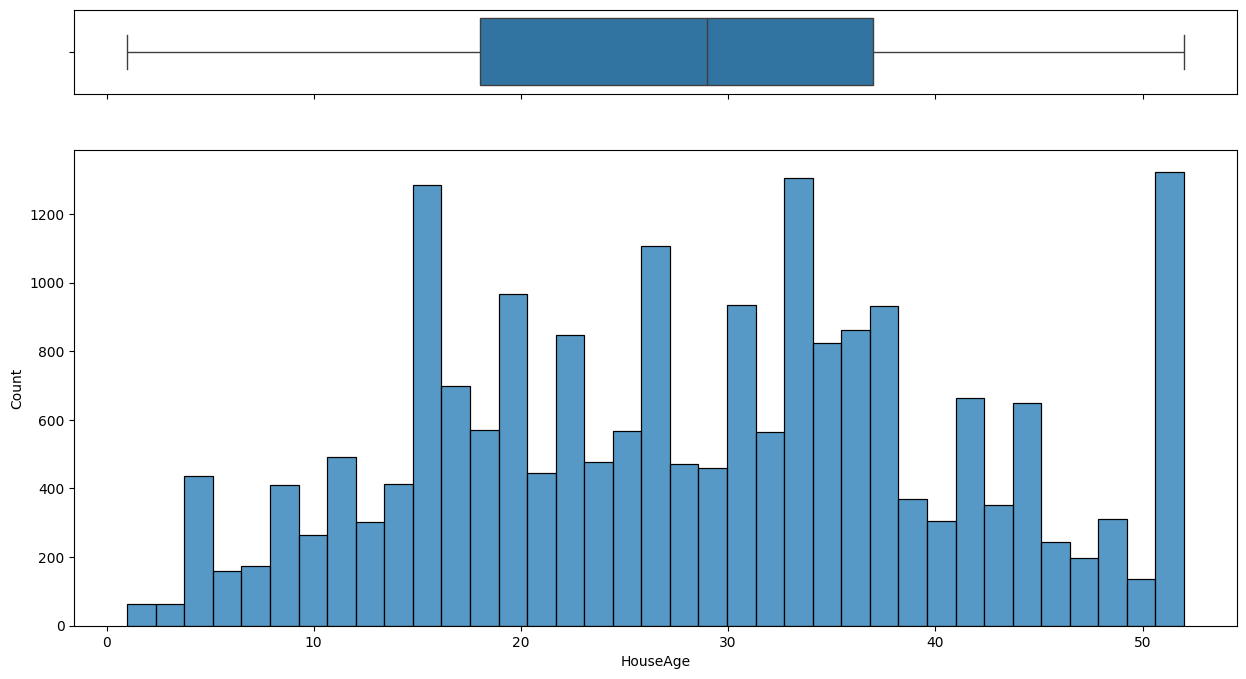

Generando gráficos para la columna: AveRooms


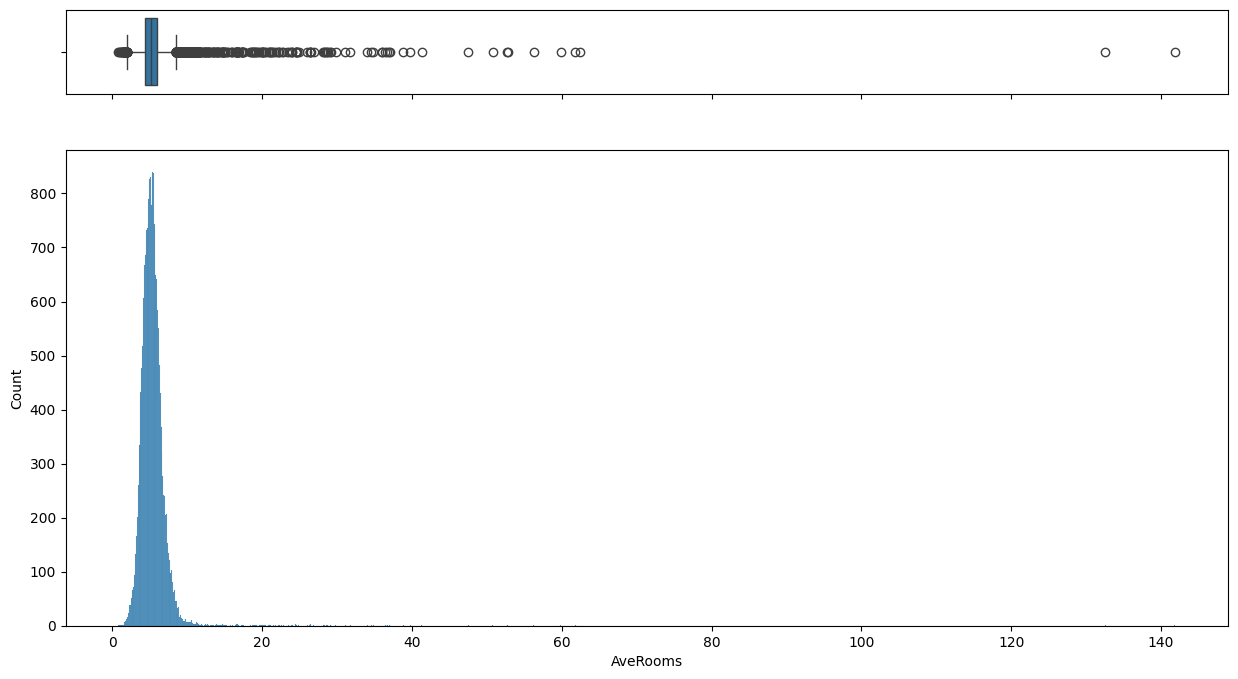

Generando gráficos para la columna: AveBedrms


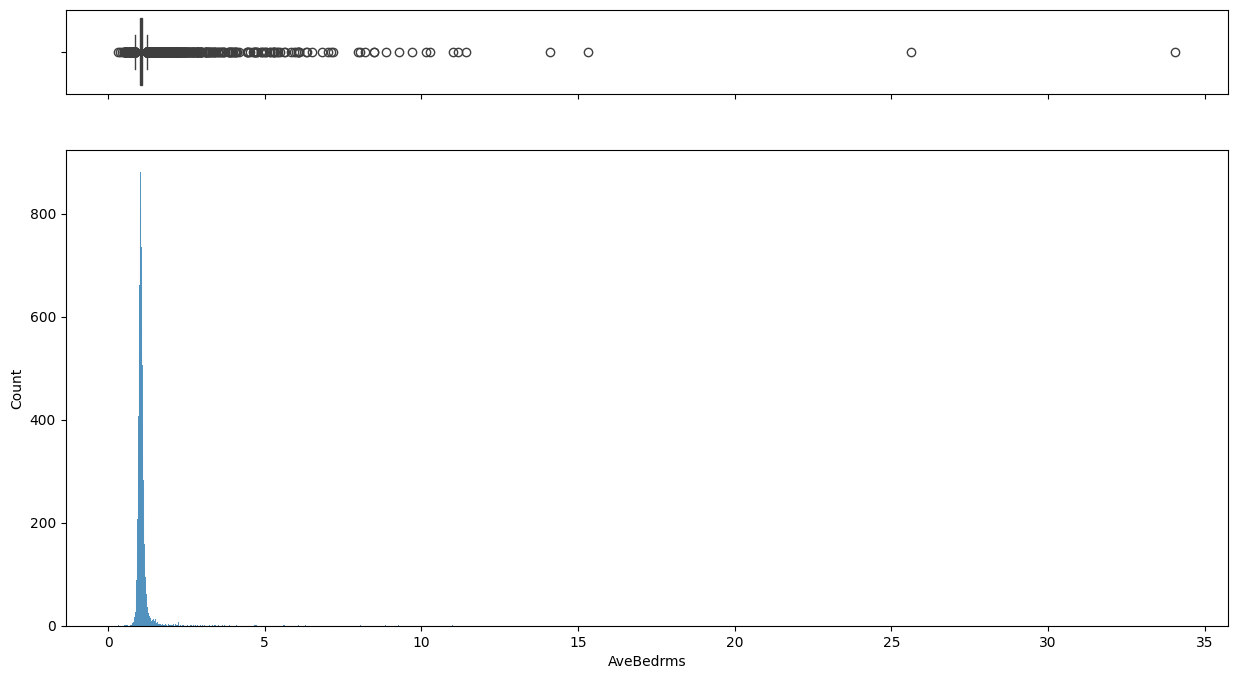

Generando gráficos para la columna: Population


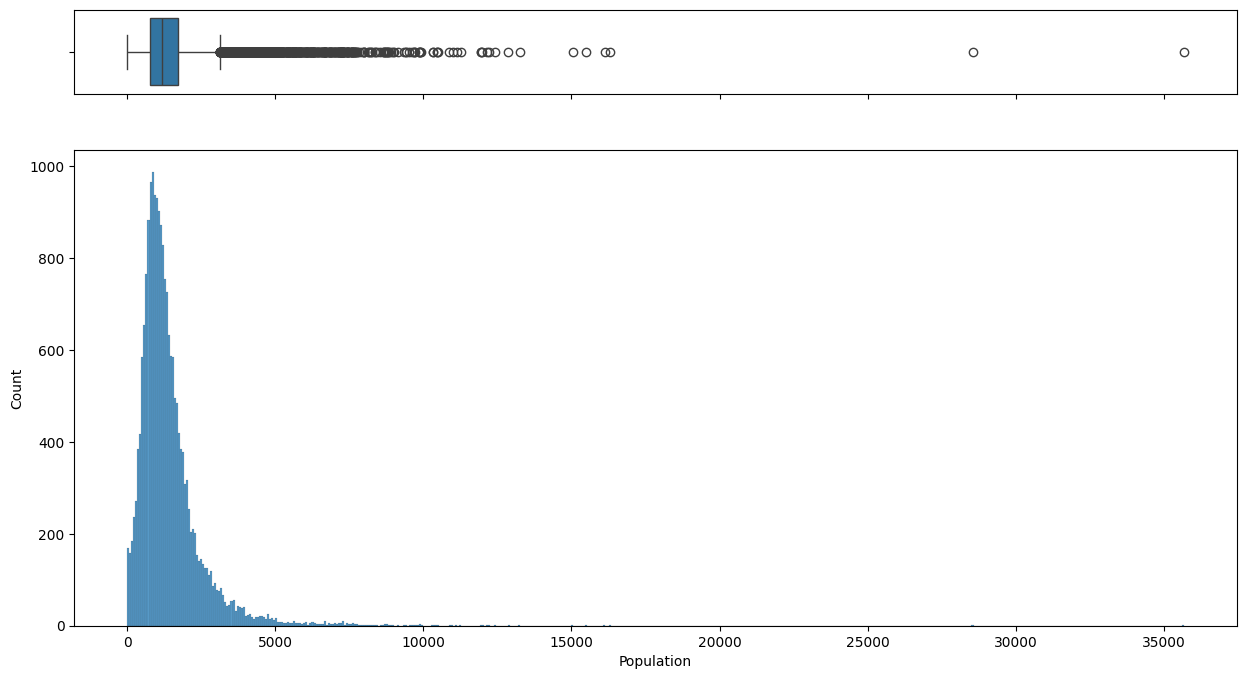

Generando gráficos para la columna: AveOccup


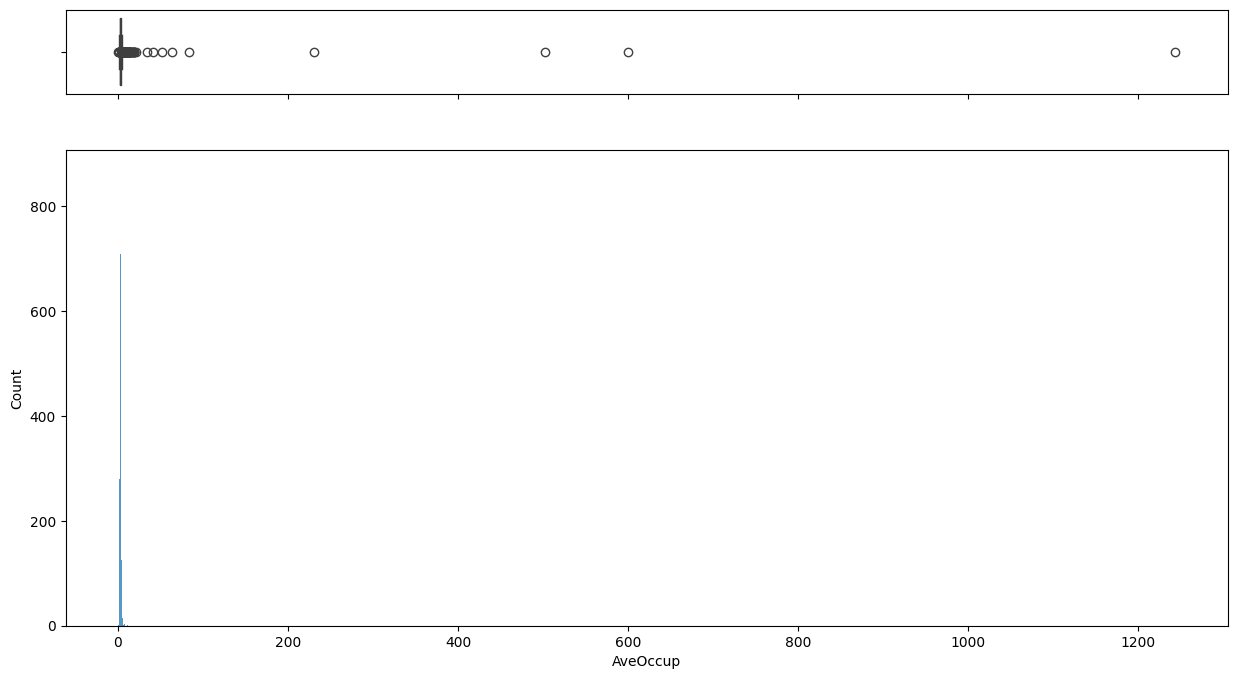

Generando gráficos para la columna: Latitude


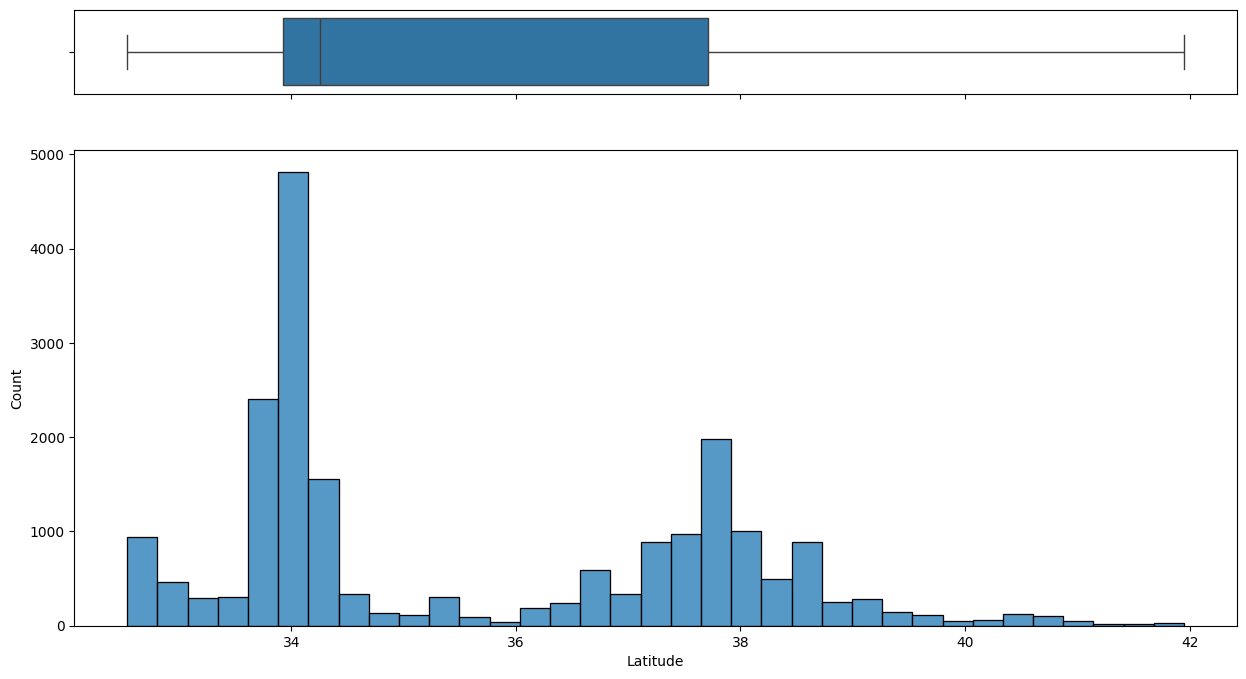

Generando gráficos para la columna: Longitude


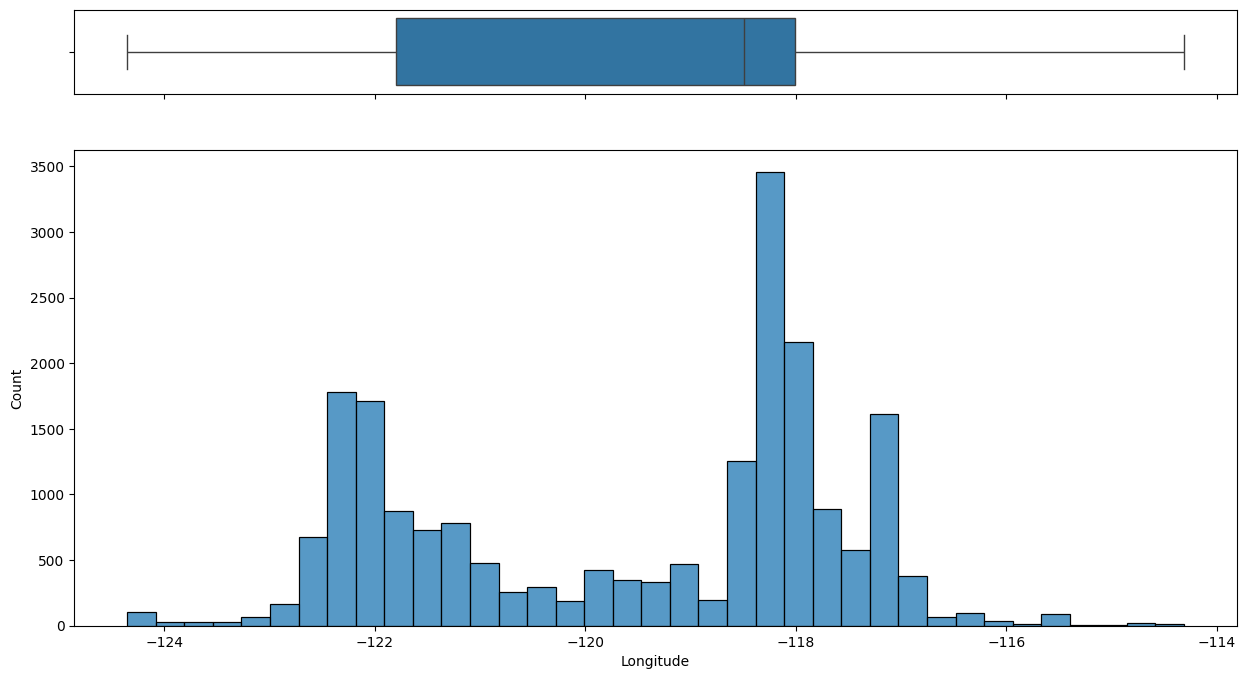

Generando gráficos para la columna: MedHouseVal


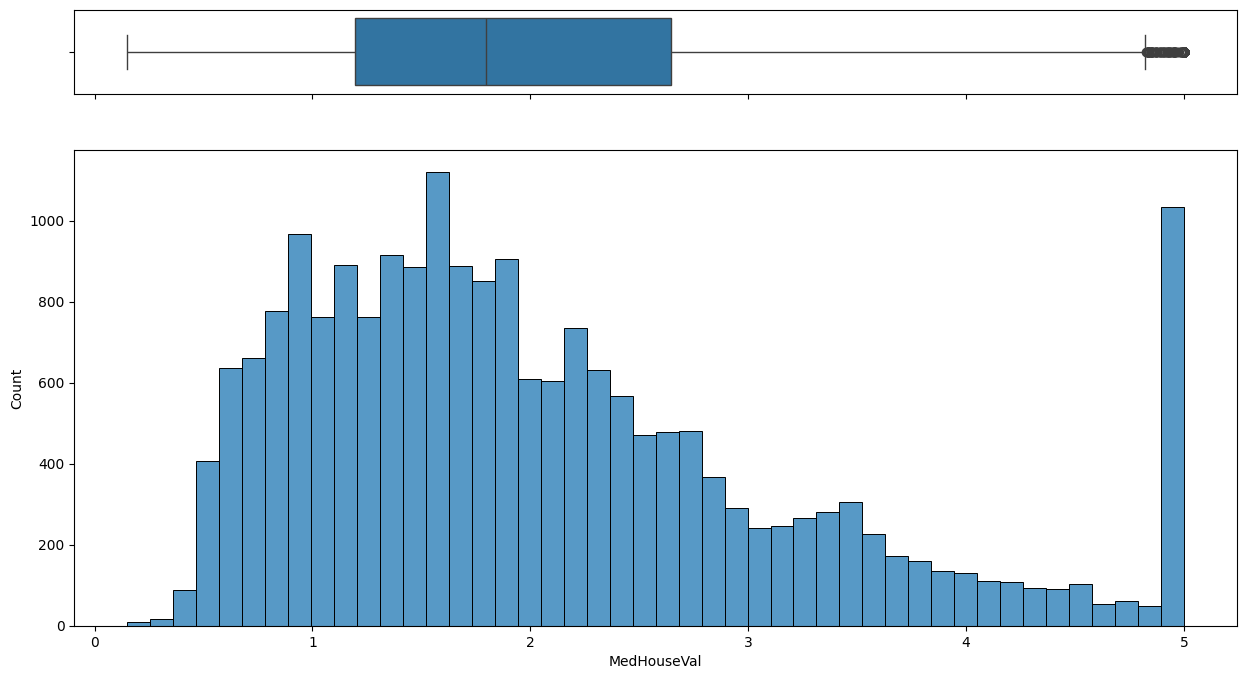

In [29]:
plot_all_numeric_columns(df_california)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Crear una instancia del escalador
scaler = StandardScaler()

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df_california.select_dtypes(include=['number']).columns

# Ajustar el escalador y transformar los datos
df_scaled = pd.DataFrame(scaler.fit_transform(df_california[numeric_columns]), columns=numeric_columns)


In [32]:
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


Generando gráficos para la columna: MedInc


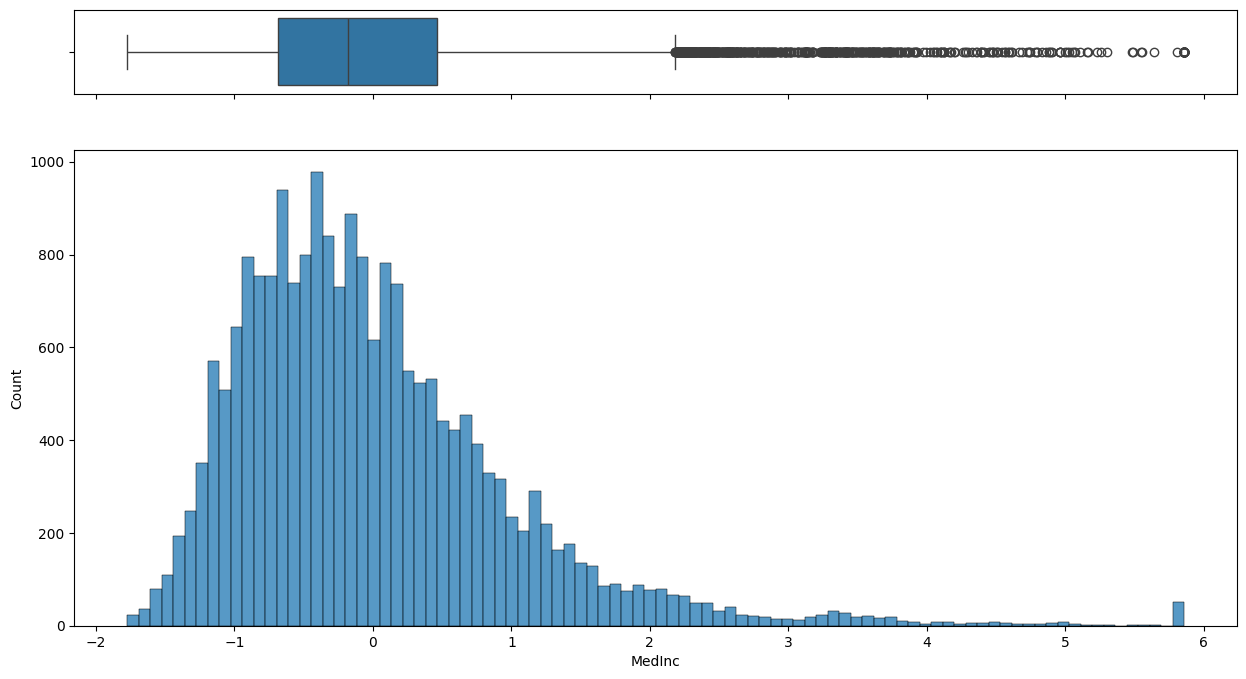

Generando gráficos para la columna: HouseAge


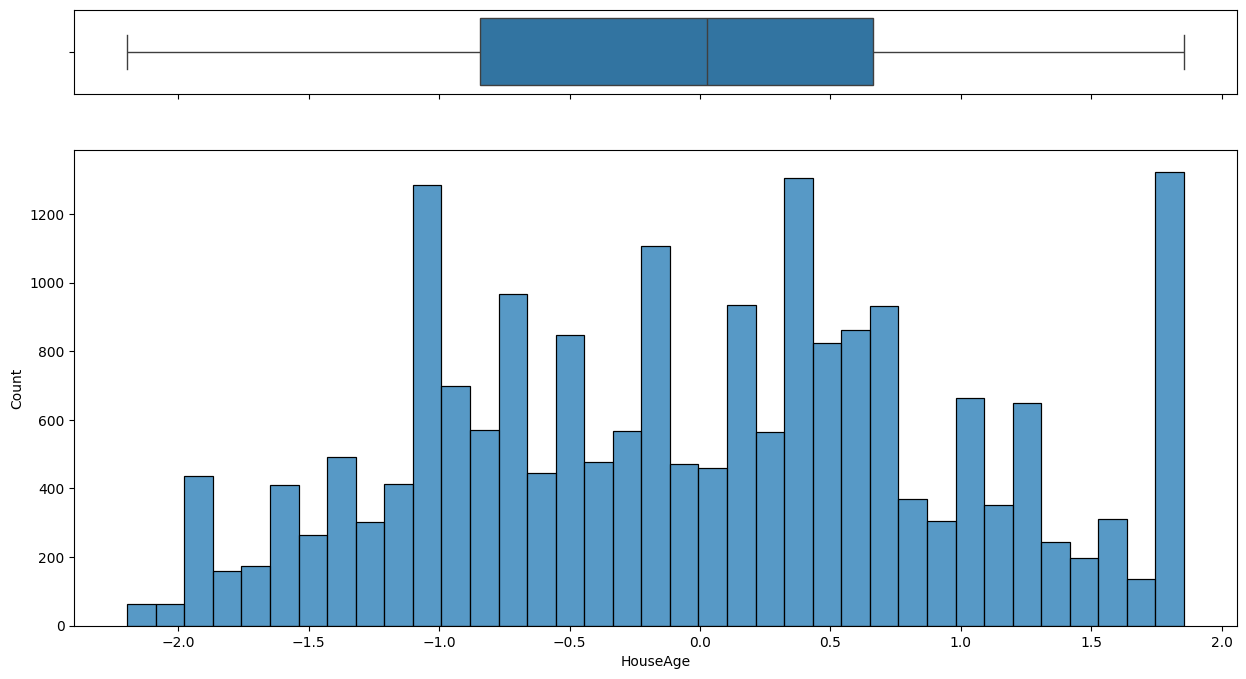

Generando gráficos para la columna: AveRooms


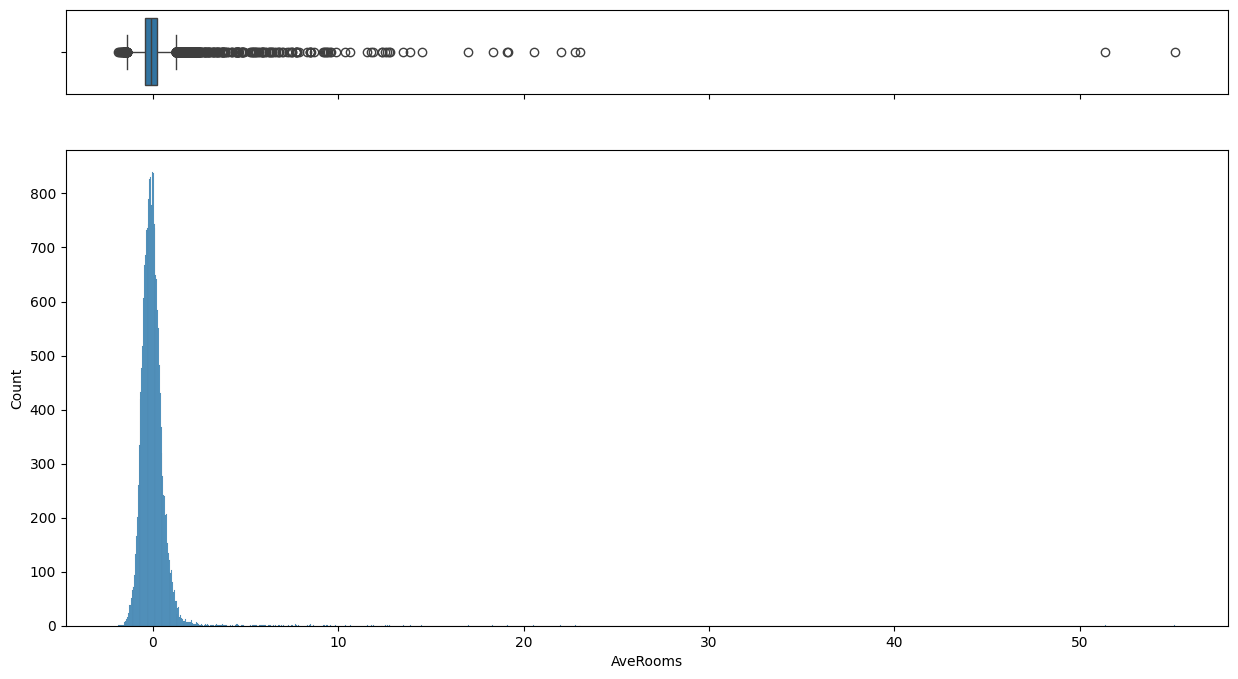

Generando gráficos para la columna: AveBedrms


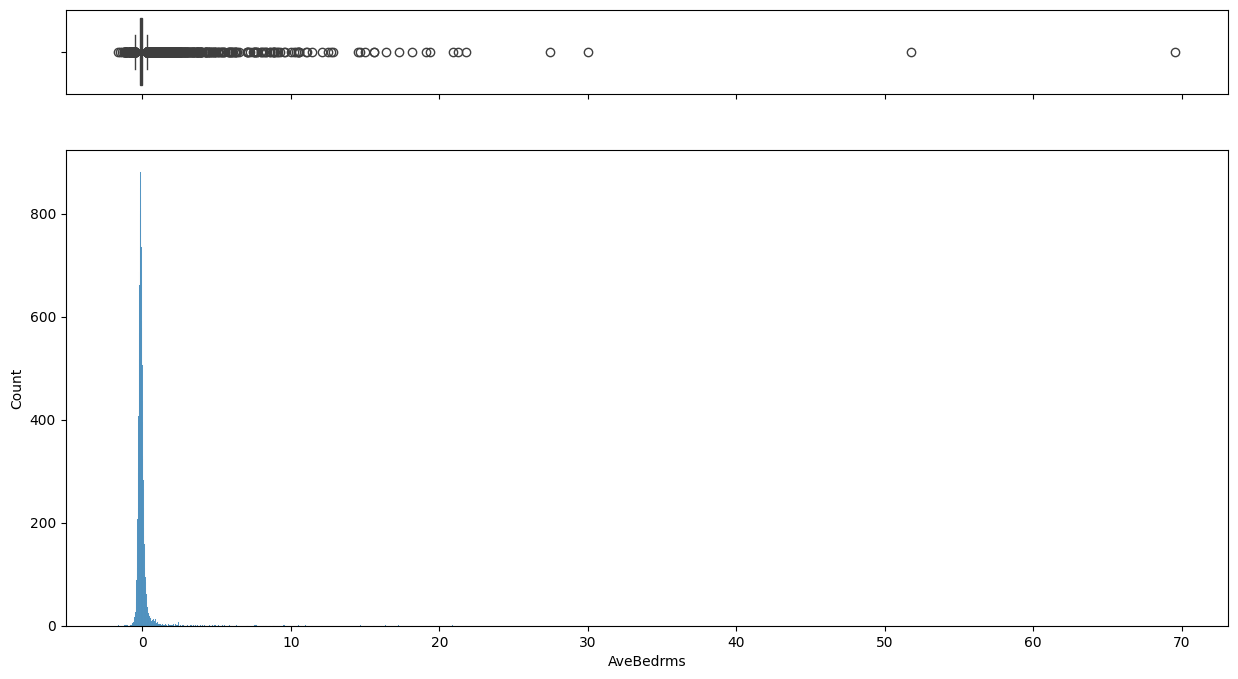

Generando gráficos para la columna: Population


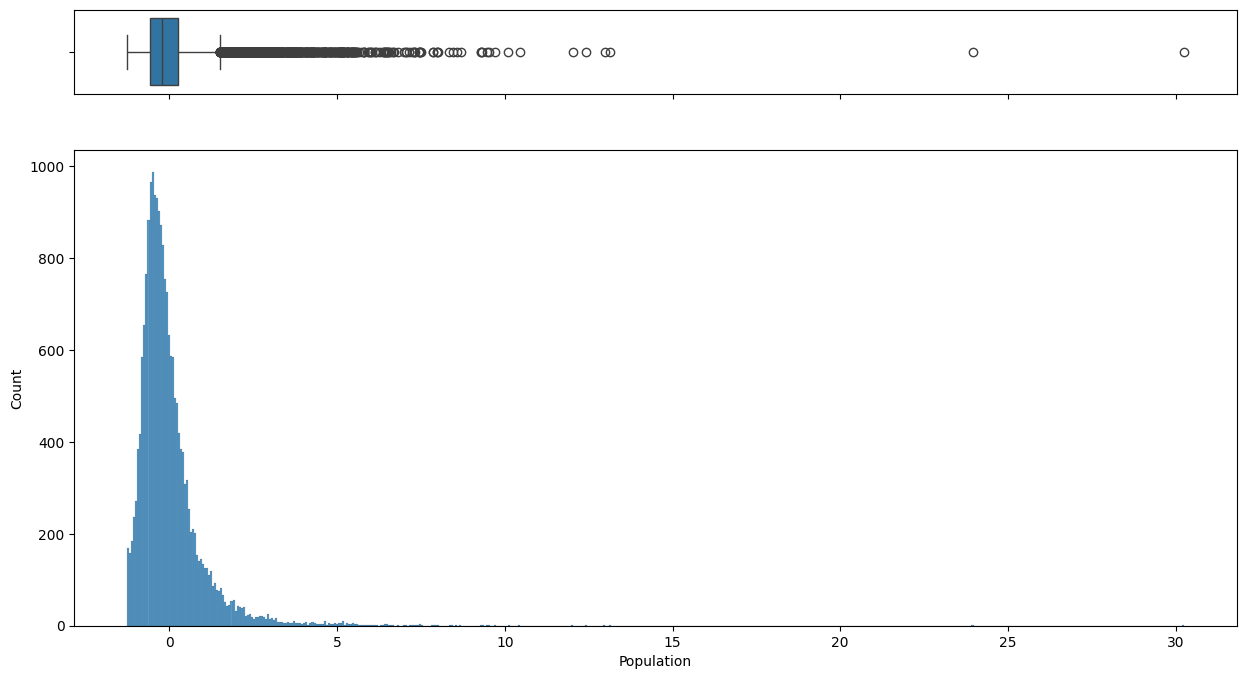

Generando gráficos para la columna: AveOccup


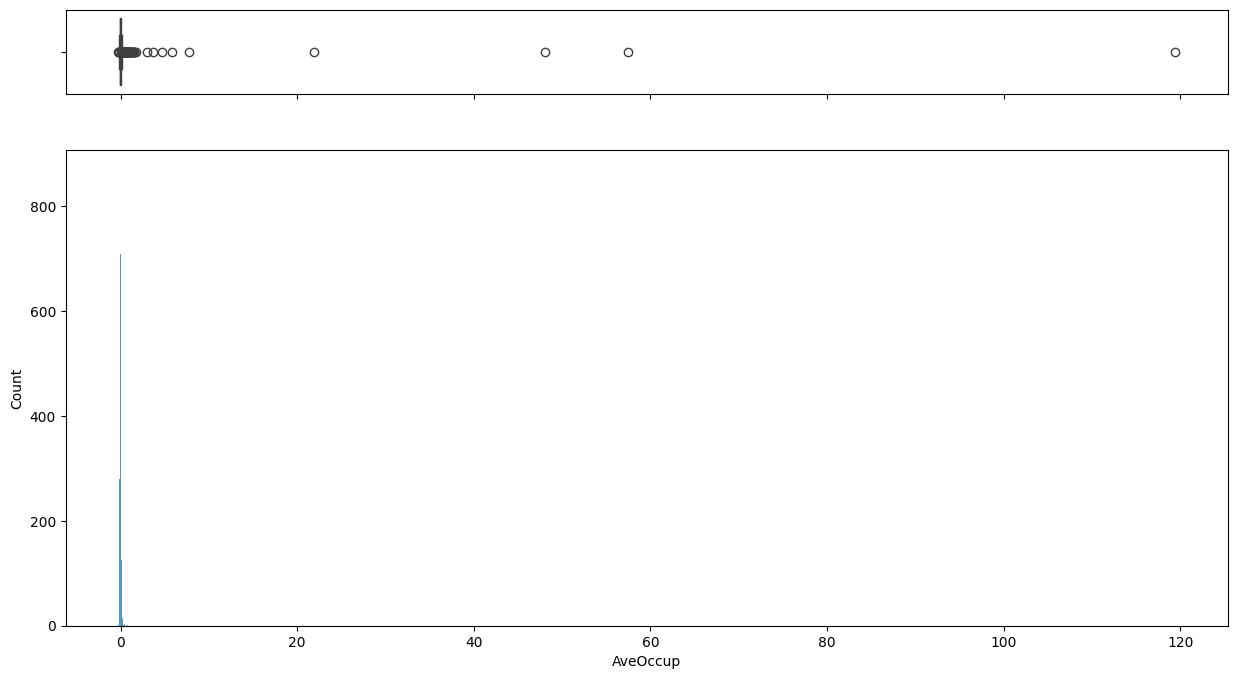

Generando gráficos para la columna: Latitude


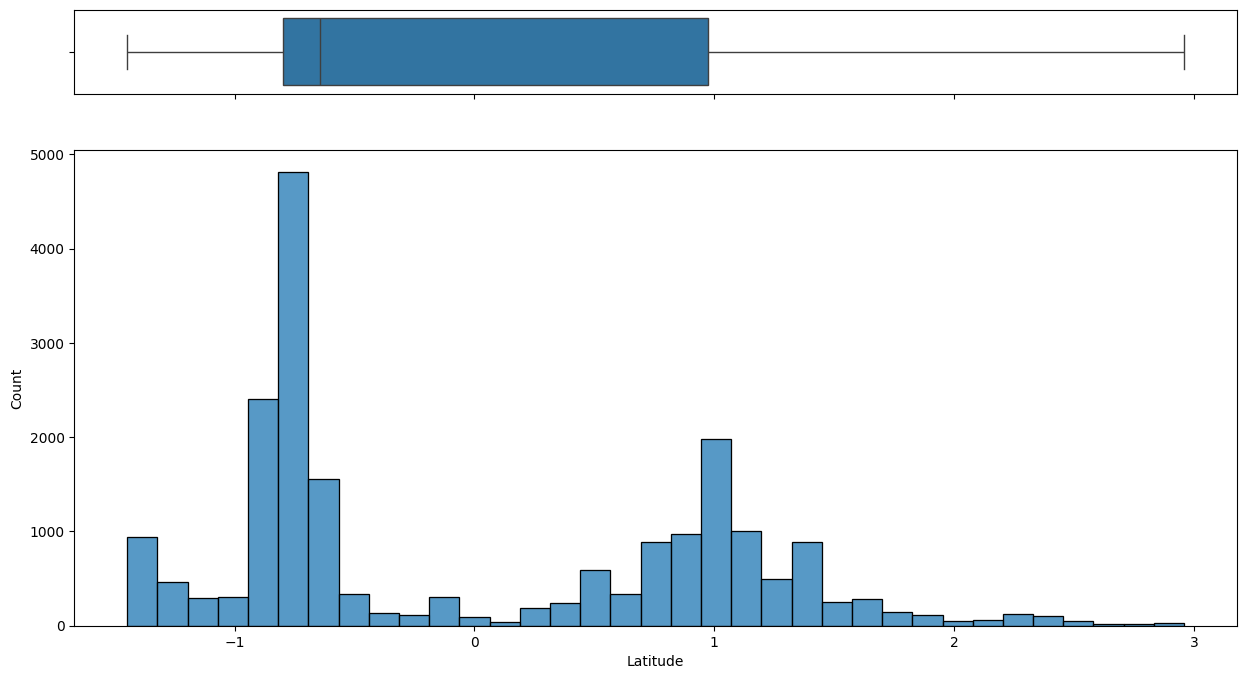

Generando gráficos para la columna: Longitude


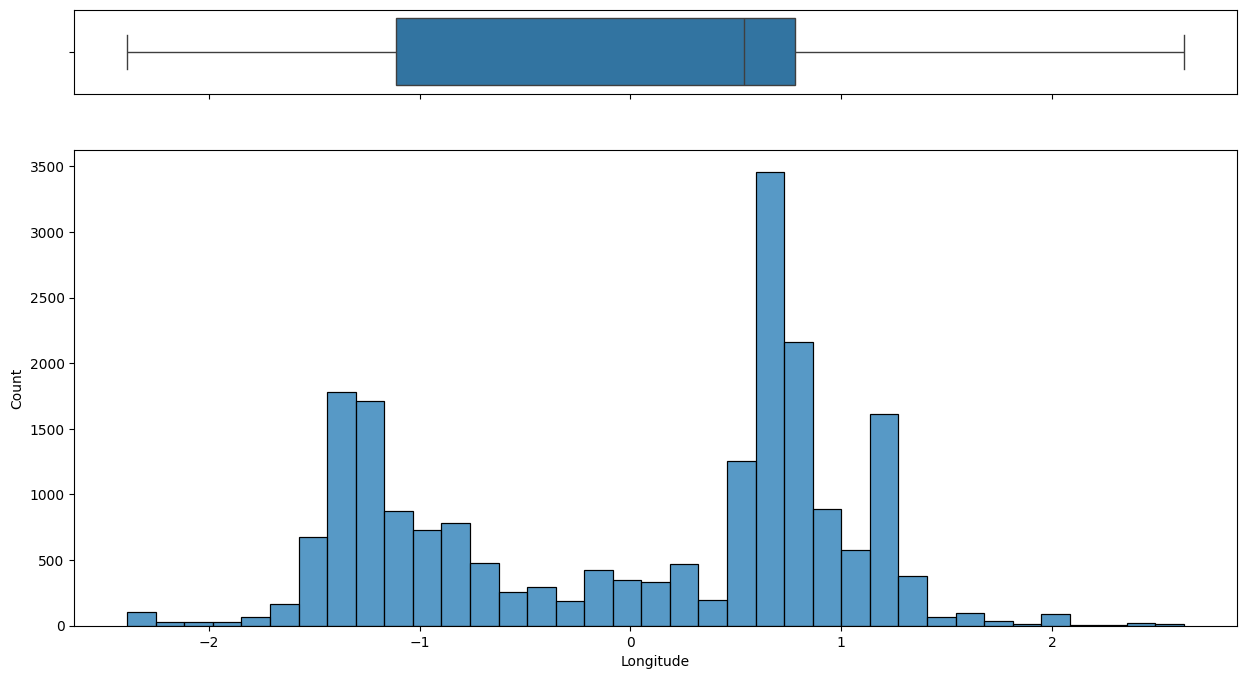

Generando gráficos para la columna: MedHouseVal


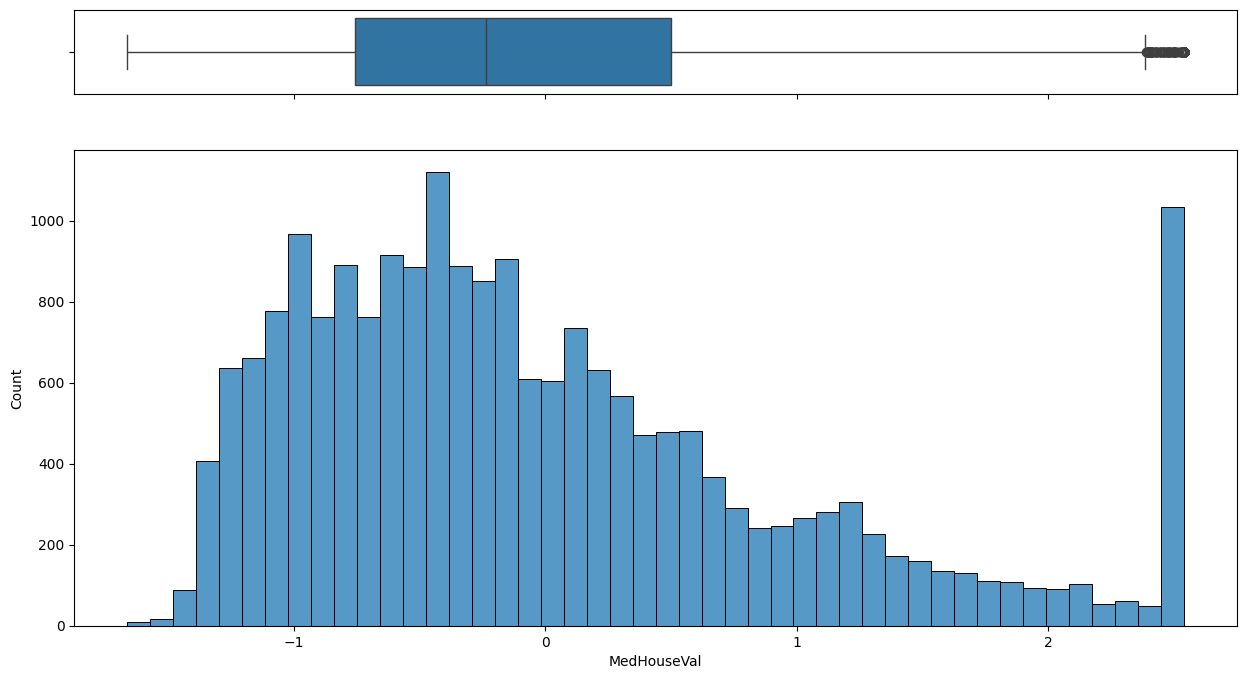

In [33]:
plot_all_numeric_columns(df_scaled)

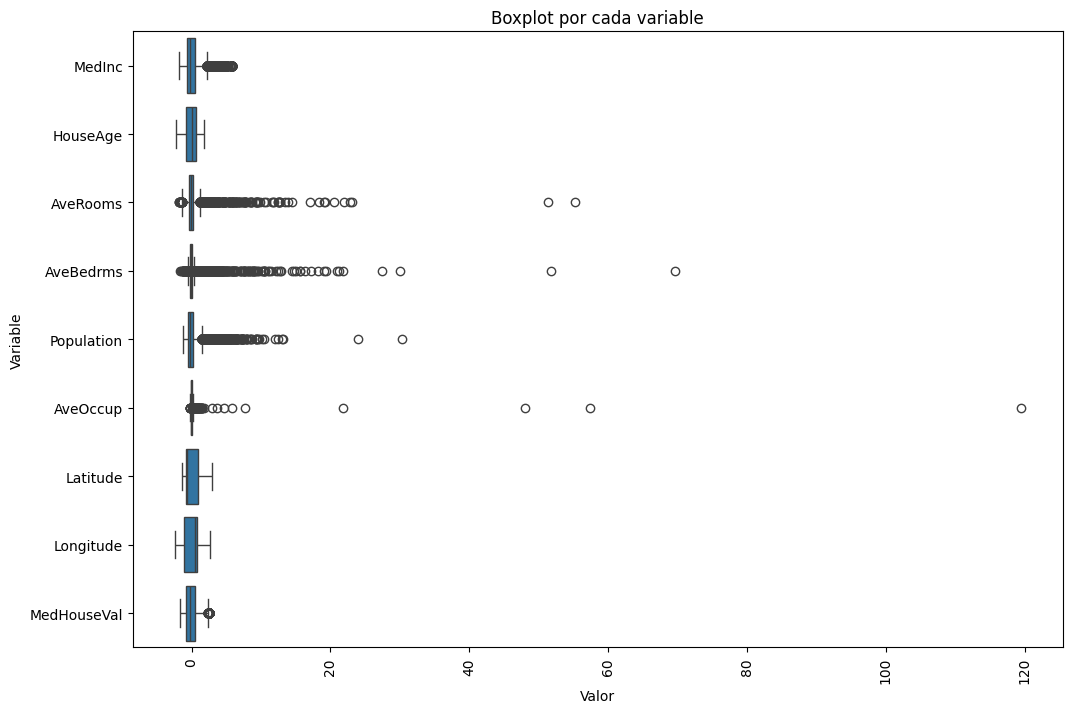

In [34]:
# Crear un boxplot con seaborn para cada variable
plt.figure(figsize=(12, 8))
sns.boxplot(y='Variable', x='Valor', 
            data=pd.melt(df_scaled, 
                         var_name='Variable', 
                         value_name='Valor'))
plt.xticks(rotation=90)  # Rotar los nombres de las columnas para que sean más legibles
plt.title('Boxplot por cada variable')
plt.show()

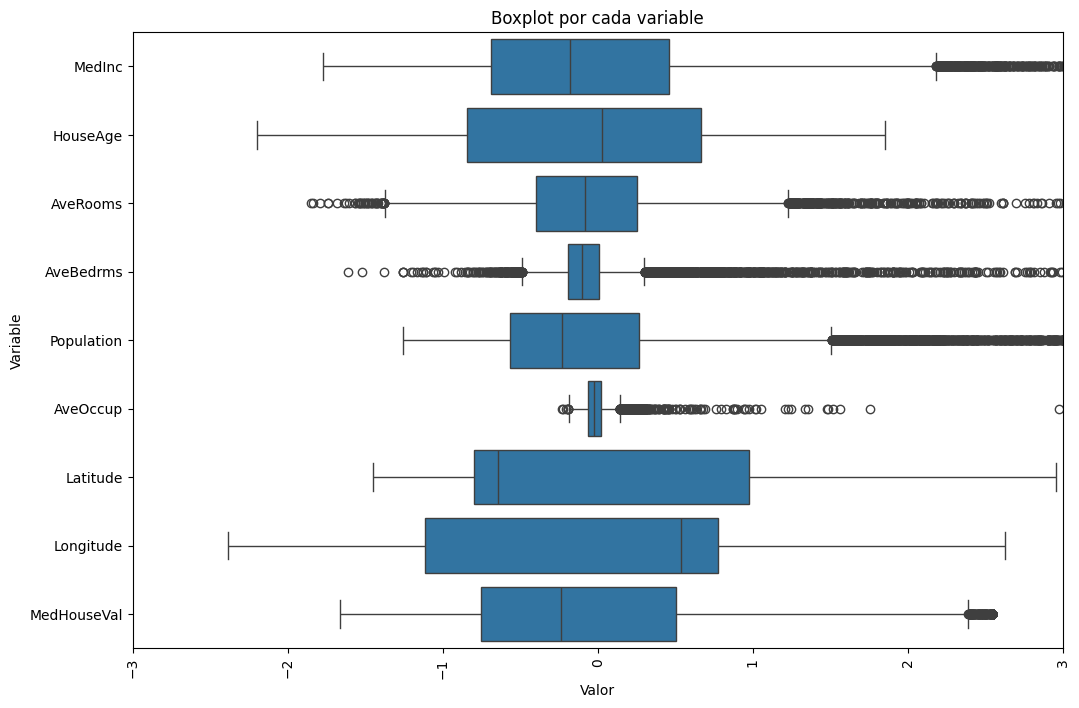

In [35]:
# Crear un boxplot con seaborn para cada variable
plt.figure(figsize=(12, 8))
sns.boxplot(y='Variable', x='Valor', 
            data=pd.melt(df_scaled, 
                         var_name='Variable', 
                         value_name='Valor'))
plt.xticks(rotation=90)  # Rotar los nombres de las columnas para que sean más legibles
plt.xlim(-3, 3) 
plt.title('Boxplot por cada variable')
plt.show()

## Consigna 3:
Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [36]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (14448, 8)
Valores de y_train: 14448
Dimension de X_test: (6192, 8)
Valores de y_test: 6192


In [37]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
print(f"Las medias del escalador es {sc_X.mean_}")
print(f"Los desvío estándar del escalador es {np.sqrt(sc_X.var_)}")

Las medias del escalador es [ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]
Los desvío estándar del escalador es [1.90484248e+00 1.26131971e+01 2.45348438e+00 4.47482496e-01
 1.14018573e+03 1.23732074e+01 2.13566827e+00 2.00286090e+00]


In [38]:
# Escalemos el set de testeo
X_test_scaled = sc_X.transform(X_test)

In [39]:
regresion = LinearRegression()
regresion.fit(X_train_scaled, y_train)
print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 2.0692396089424165
Los valores de los coeficientes de la recta sera [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [40]:
import statsmodels.api  as sm

In [41]:
# Suponiendo que tienes X_train_scaled y y_train
# statsmodels requiere que agregues manualmente una columna de unos (bias/intercepto) a X
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
# Alinear los índices de y_train con los de X_train_scaled_with_const

# Crear el modelo de regresión
modelo = sm.OLS(y_train, X_train_scaled_with_const)

# Ajustar el modelo
resultados = modelo.fit()

# Imprimir un resumen estadístico detallado
print(resultados.summary())

# Acceder a los valores de interés directamente
print(f"El valor de la intersección de la recta será {resultados.params[0]}")
print(f"Los valores de los coeficientes de la recta serán {resultados.params[1:]}")

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:50:55   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14439   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0692      0.006    343.700      0.0

/var/folders/zj/p320qjb544l01s__0cwbt9500000gn/T/ipykernel_99035/2886229161.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"El valor de la intersección de la recta será {resultados.params[0]}")


In [42]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [43]:
print(f"El coeficiente de Pearson es {round(regresion.score(X_train_scaled, y_train),3)}")

El coeficiente de Pearson es 0.609


In [44]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-7))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 0.7236099201089693


El desvío estándar del modelo indica la dispersión de los residuos.
Si el valor es bajo, significa que el modelo está ajustado y las predicciones están relativamente cerca de los valores reales.Este valor se utiliza para evaluar la precisión del modelo de regresión lineal y compararlo con otros modelos.

In [45]:
print(f"Desvío estándar del label {np.std(y_train)}")

Desvío estándar del label 1.157452365098417


¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [46]:
std_dev_model/np.std(y_train)

0.625174687035558

Interpretación de los resultados:
1. Desvío estándar del modelo: 0.7236
   
Este valor mide la dispersión de los errores (residuos) del modelo, es decir, la diferencia entre los valores reales (y_train) y los valores predichos por el modelo. En promedio, los valores predichos están a una distancia de 0.7236 unidades de los valores reales.

2. Desvío estándar del target (label): 1.1575
   
Este valor mide la variabilidad natural de los valores de y_train (el target). El desvío estándar de 1.1575 nos dice que, en promedio, los valores de y_train se desvían 1.1575 unidades de su media.

*Comparación:*
*. Desvío estándar del modelo < Desvío estándar del target:
**.El desvío estándar del modelo es menor que el del target (0.7236 < 1.1575). Esto es un buen indicio de que el modelo está capturando el comportamiento del target, ya que los errores de predicción son menores que la variabilidad natural del target.

En otras palabras, si solo tuviéramos la media de los valores de y_train, los valores del target se desviarían en promedio 1.1575 unidades de la media. Pero el modelo reduce ese error a 0.7236, lo que sugiere que está haciendo un mejor trabajo al capturar la relación entre las variables independientes y el target.

*. Conclusión:
El modelo sí parece estar capturando el comportamiento del target. El hecho de que el desvío estándar del modelo sea menor que el desvío estándar del target implica que el modelo ha logrado reducir la variabilidad de los errores respecto a lo que se observaría si solo usáramos la media del target.

En resumen, el modelo parece estar ajustándose bien a los datos y prediciendo con una precisión aceptable, aunque podría mejorarse aún más dependiendo del contexto y los requisitos de precisión del modelo. Si el desvío estándar del modelo fuera más cercano al del target, o incluso mayor, eso sería un indicativo de un modelo poco ajustado o con una capacidad de predicción insuficiente.

## Consigna4:
Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [47]:
#Otenemos las predicciones del modelo
y_pred = regresion.predict(X_test_scaled)

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [49]:
#scikit-learn no tiene el error porcentual medio (MPE) lo vamos a crear nosotros
def mean_porcentual_error(yreal, ypred):

    return np.mean((yreal-ypred)/yreal)

In [50]:
# Definir la función para calcular y mostrar las métricas
def calcular_metricas(y_test, y_pred):
    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Opcional: crear tu propia función de MPE si no tienes una implementada
    mpe = np.mean((y_test - y_pred) / y_test)
    
    # Crear un DataFrame con las métricas
    metricas_df = pd.DataFrame({
        "Métrica": ["R-cuadrado", "Error absoluto medio (MAE)", "Error cuadrático medio (MSE)", 
                    "Raíz del error cuadrático medio (RMSE)", "Error absoluto porcentual medio (MAPE)", 
                    "Error porcentual medio (MPE)"],
        "Valor": [r2, mae, mse, rmse, mape*100, mpe*100]
    })
    
    # Mostrar el DataFrame
    return metricas_df


In [51]:
calcular_metricas(y_test, y_pred)

,Métrica,Valor
0,R-cuadrado,0.595770
1,Error absoluto medio (MAE),0.527247
2,Error cuadrático medio (MSE),0.530568
3,Raíz del error cuadrático medio (RMSE),0.728401
4,Error absoluto porcentual medio (MAPE),31.750266
5,Error porcentual medio (MPE),-12.718758


## Consigna 5:
Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α

In [52]:
alpha_values = np.linspace(0, 12.5, 40)
alpha_values

array([ 0.        ,  0.32051282,  0.64102564,  0.96153846,  1.28205128,
        1.6025641 ,  1.92307692,  2.24358974,  2.56410256,  2.88461538,
        3.20512821,  3.52564103,  3.84615385,  4.16666667,  4.48717949,
        4.80769231,  5.12820513,  5.44871795,  5.76923077,  6.08974359,
        6.41025641,  6.73076923,  7.05128205,  7.37179487,  7.69230769,
        8.01282051,  8.33333333,  8.65384615,  8.97435897,  9.29487179,
        9.61538462,  9.93589744, 10.25641026, 10.57692308, 10.8974359 ,
       11.21794872, 11.53846154, 11.85897436, 12.17948718, 12.5       ])

In [53]:
# Lista para almacenar los errores cuadráticos medios
mse_values = []

# Iterar sobre cada valor de alpha
for alpha in alpha_values:
    # Definir el modelo Ridge con el valor actual de alpha
    ridge_model = Ridge(alpha=alpha)

    # Calcular el MSE utilizando validación cruzada (scoring = "neg_mean_squared_error")
    mse = cross_val_score(ridge_model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

    # Almacenar el promedio del MSE (se multiplica por -1 para hacerlo positivo)
    mse_values.append(-mse.mean())

results_df = pd.DataFrame({
    'Alpha': alpha_values,
    'MSE': mse_values
      })

In [54]:
results_df

,Alpha,MSE
0,0.000000,0.526825
1,0.320513,0.526825
2,0.641026,0.526824
3,0.961538,0.526823
4,1.282051,0.526823
5,1.602564,0.526822
6,1.923077,0.526821
7,2.243590,0.526821
8,2.564103,0.526820
9,2.884615,0.526820


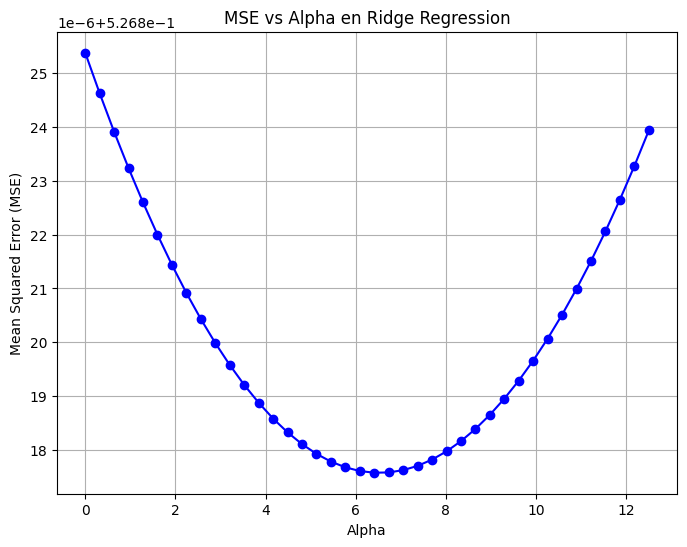

In [55]:
# Graficar alpha vs MSE
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Alpha en Ridge Regression')
plt.grid(True)
plt.show()

In [56]:
# Encontrar el índice del menor MSE
min_mse_index = results_df['MSE'].idxmin()

# Encontrar el valor de alpha correspondiente al menor MSE
best_alpha = results_df.iloc[min_mse_index]['Alpha']
best_mse = results_df.iloc[min_mse_index]['MSE']
best_mae = mean_absolute_error(y_test, y_pred)

# Imprimir el valor de alpha y el MSE correspondiente
print(f"El valor óptimo de Alpha es: {best_alpha}")
print(f"El menor MSE es: {best_mse}")
print(f"El menor MAE es: {best_mae}")

El valor óptimo de Alpha es: 6.410256410256411
El menor MSE es: 0.5268175785397802
El menor MAE es: 0.5272474538305952


## Consigna 6:
Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

## 6. Comparación entre Regresión Lineal y Ridge

Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [62]:
# Calcular métricas para Regresión Lineal
y_pred_linear = regresion.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Calcular métricas para Regresión Ridge
best_alpha = results_df.loc[results_df['MSE'].idxmin(), 'Alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Comparación de resultados
print("Resultados de Regresión Lineal:")
print(f"MSE: {mse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print("\nResultados de Regresión Ridge:")
print(f"MSE: {mse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")

# Determinar cuál modelo es mejor
mejor_modelo = "Ridge" if mse_ridge < mse_linear else "Lineal"
print(f"\nEl modelo de Regresión {mejor_modelo} proporciona mejores resultados.")

# Calcular la mejora porcentual
mejora_mse = ((mse_linear - mse_ridge) / mse_linear) * 100
mejora_mae = ((mae_linear - mae_ridge) / mae_linear) * 100
print(f"Mejora porcentual en MSE: {mejora_mse:.2f}%")
print(f"Mejora porcentual en MAE: {mejora_mae:.2f}%")

Resultados de Regresión Lineal:
MSE: 0.5306
MAE: 0.5272

Resultados de Regresión Ridge:
MSE: 0.5304
MAE: 0.5272

El modelo de Regresión Ridge proporciona mejores resultados.
Mejora porcentual en MSE: 0.03%
Mejora porcentual en MAE: 0.00%


### Análisis de resultados

Al comparar la Regresión Lineal simple con la Regresión Ridge en el conjunto de datos de California Housing, observamos resultados muy similares:

1. **Mejora marginal**: 
   - Regresión Lineal: MSE = 0.5306, MAE = 0.5272
   - Regresión Ridge: MSE = 0.5304, MAE = 0.5272
   La mejora en MSE es solo del 0.03%, y no hay mejora en MAE.

2. **Características del conjunto de datos de California Housing**:
   - Este dataset es conocido por ser relativamente limpio y bien estructurado.
   - Contiene 20,640 muestras y solo 8 características, proporcionando una buena relación entre muestras y características.
   - Las relaciones entre las variables predictoras y el precio de las casas tienden a ser bastante lineales.

3. **Interpretación de los resultados**:
   a) **Ausencia de sobreajuste significativo**: La mínima mejora de Ridge sugiere que el modelo lineal simple no estaba sobreajustando significativamente.
   
   b) **Multicolinealidad limitada**: El dataset probablemente no presenta problemas graves de multicolinealidad entre las variables predictoras.
   
   c) **Estabilidad del modelo lineal**: El modelo de regresión lineal ya parece ser bastante estable y generalizable para este conjunto de datos.

4. **Impacto de la regularización**:
   - Aunque teóricamente Ridge puede reducir el error de varianza, en este caso la reducción es mínima.
   - El valor óptimo de alpha encontrado para Ridge probablemente es muy pequeño, haciendo que el modelo Ridge sea prácticamente idéntico al modelo lineal.

5. **Consideraciones sobre el preprocesamiento**:
   - El uso de StandardScaler en los datos puede haber mitigado algunos problemas que Ridge está diseñado para abordar, reduciendo aún más la diferencia entre los modelos.

6. **Rendimiento típico para este dataset**:
   - Un MSE alrededor de 0.53 (recordando que el target está en unidades de $100,000) es razonable.
   - Esto se traduce en un error cuadrático medio de aproximadamente $72,800, lo cual es sensato dada la variabilidad en los precios de las viviendas en California.

7. **Implicaciones prácticas**:
   - En escenarios del mundo real, especialmente con datasets bien comportados como este, es común ver solo mejoras marginales al pasar de modelos simples a más complejos.
   - La simplicidad y interpretabilidad del modelo lineal podrían preferirse en este caso, dado que no hay una ganancia significativa en rendimiento con Ridge.

En conclusión, mientras que teóricamente la Regresión Ridge puede ofrecer ventajas sobre la Regresión Lineal simple, en este caso específico con el dataset de California Housing, ambos modelos muestran un rendimiento prácticamente idéntico. Esto subraya la importancia de considerar las características específicas del conjunto de datos y no asumir automáticamente que modelos más complejos siempre proporcionarán mejoras significativas. También destaca el valor de la regresión lineal simple como punto de referencia robusto en análisis de datos y modelado predictivo.

## Consigna EXTRA - Datos Geograficos

In [57]:
# URL del archivo GeoJSON
url = 'https://raw.githubusercontent.com/ucd-library/california-counties/master/geojson/california_counties.geojson'

# Cargar el GeoJSON directamente desde la URL
california_counties = gpd.read_file(url)

# Verificar los primeros registros
print(california_counties.head())

        name          fullname abbrev abcode ansi  \
0   Siskiyou   Siskiyou County    SIS   c047  093   
1  Del Norte  Del Norte County    DNT   c008  015   
2      Modoc      Modoc County    MOD   c025  049   
3    Trinity    Trinity County    TRI   c053  105   
4     Shasta     Shasta County    SHA   c045  089   

                                            geometry  
0  POLYGON ((-121.44597 41.18390, -121.46238 41.1...  
1  MULTIPOLYGON (((-124.19097 41.73619, -124.1933...  
2  POLYGON ((-121.44784 41.99739, -121.42322 41.9...  
3  POLYGON ((-122.66795 40.77637, -122.66814 40.7...  
4  POLYGON ((-122.17328 40.37906, -122.17359 40.3...  


In [58]:
# Establecer el sistema de coordenadas geográficas (EPSG:4326 para WGS84)
california_counties.set_crs(epsg=4326, inplace=True)

# Convertir al sistema de coordenadas proyectadas (Web Mercator) para usar con el mapa base
california_counties = california_counties.to_crs(epsg=3857)

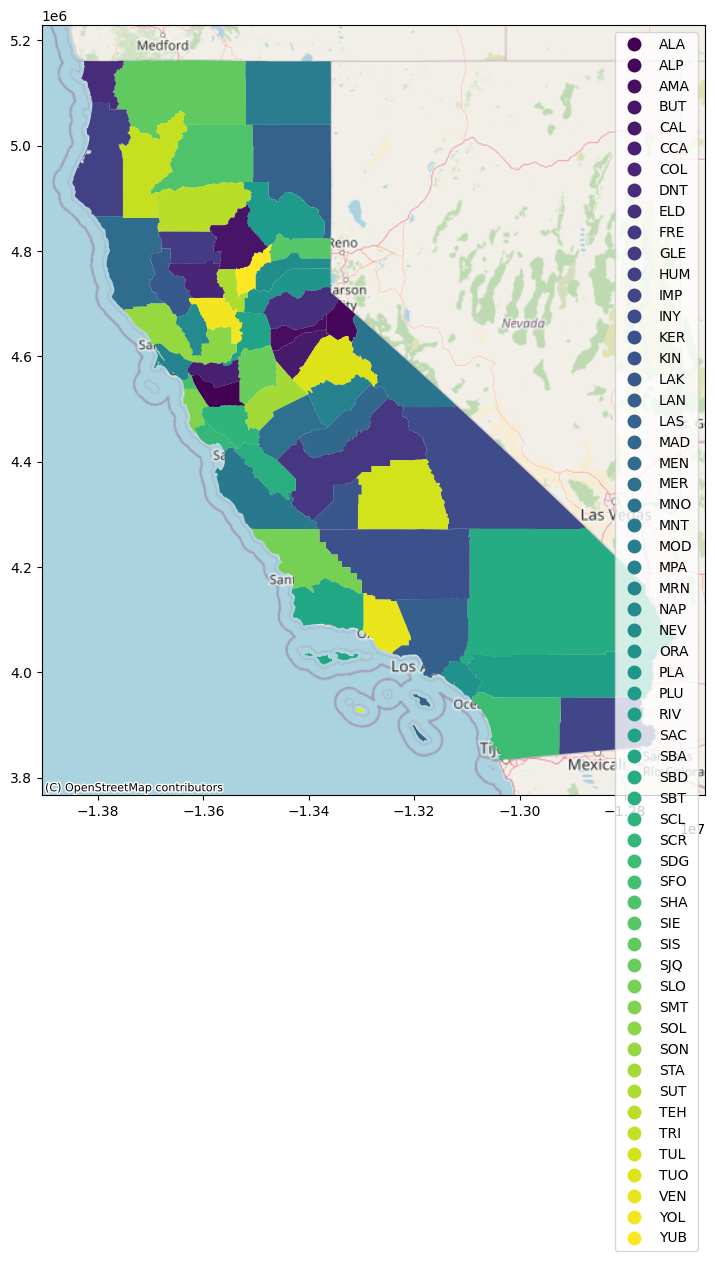

In [59]:


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))


# Graficar los puntos en el mapa
california_counties.plot(ax=ax, column='abbrev',  # Especificar la columna para el color
        cmap='viridis',        # Usar una paleta continua (puedes cambiar por 'plasma', 'inferno', etc.)
        legend=True,  
        marker='o', markersize=5)

# Añadir un mapa base usando contextily (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar el mapa
plt.show()

In [60]:
# Diccionario que define las agrupaciones de los condados
agrupaciones = {
    "Northern California": ["Siskiyou", "Del Norte", "Modoc", "Trinity", "Shasta", "Humboldt"],
    "Bay Area": ["San Francisco", "Alameda", "Contra Costa", "Marin", "San Mateo", "Santa Clara", "Solano", "Sonoma", "Napa"],
    "Central Valley": ["Sacramento", "San Joaquin", "Stanislaus", "Merced", "Fresno", "Tulare", "Kings", "Kern", "Yolo"],
    "Central Coast": ["Santa Cruz", "Monterey", "San Luis Obispo", "Santa Barbara", "Ventura"],
    "Southern California": ["Los Angeles", "Orange", "San Diego", "San Bernardino", "Riverside", "Ventura"],
    "Sierra Nevada": ["Placer", "El Dorado", "Nevada", "Amador", "Alpine", "Calaveras", "Mariposa"],
    "Inland Empire": ["San Bernardino", "Riverside"],
    "Desert Region": ["Imperial", "Inyo", "Mono"],
    "Gold Country": ["El Dorado", "Nevada", "Placer", "Calaveras", "Amador", "Tuolumne"]
}

# Crear una nueva columna en el GeoDataFrame para almacenar la agrupación
def asignar_region(county_name):
    for region, counties in agrupaciones.items():
        if county_name in counties:
            return region
    return "Otra"  # Si el condado no pertenece a ninguna de las agrupaciones

# Aplicar la función para asignar la región a cada condado
california_counties['region'] = california_counties['name'].apply(asignar_region)

# Mostrar los primeros registros con la nueva columna de agrupación
print(california_counties[['name', 'region']].head())

        name               region
0   Siskiyou  Northern California
1  Del Norte  Northern California
2      Modoc  Northern California
3    Trinity  Northern California
4     Shasta  Northern California


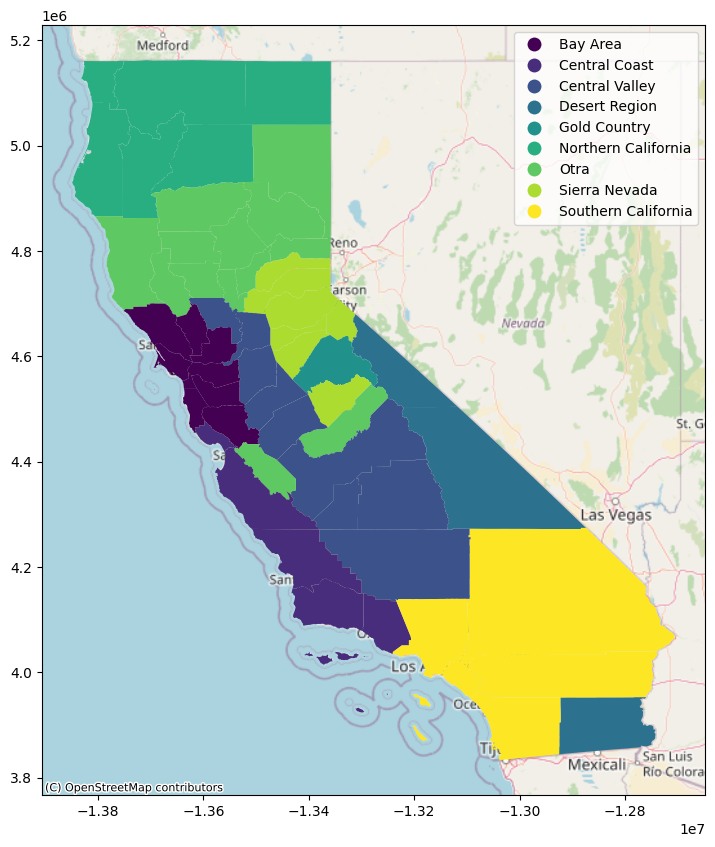

In [61]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))


# Graficar los puntos en el mapa
california_counties.plot(ax=ax, column='region',  # Especificar la columna para el color
        cmap='viridis',        # Usar una paleta continua (puedes cambiar por 'plasma', 'inferno', etc.)
        legend=True,  
        marker='o', markersize=5)

# Añadir un mapa base usando contextily (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar el mapa
plt.show()